# EEG Analysis

In [2]:
import pandas as pd
import numpy as np

file_serie1 = 'data/skytt1serie1.csv'  # Replace it with your file path
file_serie2 = 'data/skytt1serie2.csv'
file_serie3 = 'data/skytt1serie3.csv'

Load

In [3]:
raw_serie1 = pd.read_csv(file_serie1, header=None, low_memory=False)  # For Serie 1
raw_serie2 = pd.read_csv(file_serie2, header=None, low_memory=False)  # For Serie 2
raw_serie3 = pd.read_csv(file_serie3, header=None, low_memory=False) # For Serie 3

In [4]:
print(raw_serie1.sample(10))

                               0     1  2     3     4     5     6     7   \
3218   [13:31:08.403 31/03/2023]'  0.11  0  0.11  0.18  0.11  0.13  0.11   
6270   [13:31:59.267 31/03/2023]'   0.1  0  0.09  0.17   0.1  0.11  0.12   
10701  [13:33:13.108 31/03/2023]'  0.76  0  0.39   1.9  0.32  0.56  0.39   
14511  [13:34:16.602 31/03/2023]'  0.11  0  0.12  0.11  0.12  0.11  0.11   
10546  [13:33:10.520 31/03/2023]'  1.11  0  1.11  2.43   1.2  1.07  1.23   
19576  [13:35:41.011 31/03/2023]'  0.61  0  0.59  0.82   0.7   0.6  0.69   
18381  [13:35:21.091 31/03/2023]'  0.06  0  0.06  0.17  0.06  0.06  0.06   
7949   [13:32:27.247 31/03/2023]'  0.99  0  0.93  1.34  0.75  0.85  0.74   
2407   [13:30:54.889 31/03/2023]'  0.25  0  0.23  0.39  0.24  0.21  0.24   
24176  [13:36:57.667 31/03/2023]'  0.74  0  0.59   0.7  0.57  0.63  0.53   

         8     9   ...    33 34    35    36    37    38    39    40  41   42  
3218   0.11  0.45  ...  0.07  0  0.07  0.07  0.07  0.07  0.07  0.07 NaN  NaN  
6270 

In [5]:
# Drop columns 41 and 42 (0-based index: 40 and 41)
raw_serie1 = raw_serie1.drop(columns=[41, 42])

In [6]:
# Step 2: Extract the three header rows for Series 1
header1 = raw_serie1.iloc[0]  # First row: FFT Bands
header2 = raw_serie1.iloc[1]  # Second row: Frequencies
header3 = raw_serie1.iloc[2]  # Third row: Time format note (mainly first column)

# Step 3: Build new headers
new_columns = []

for col in range(len(header1)):
    if col == 0:
        # First column is Time
        new_columns.append('Time')
    else:
        # Concatenate: Band + "_" + Frequency
        new_header = f"{header1[col]}_{header2[col]}"
        new_columns.append(new_header)

# Step 4: Assign the new headers & clean data
clean_serie1 = raw_serie1.iloc[3:].copy()  # Drop the first three rows
clean_serie1.columns = new_columns      # Assign the new combined header
clean_serie1.reset_index(drop=True, inplace=True)  # Reset index

# Step 5: Convert signal columns to numeric
for col in clean_serie1.columns[1:]:  # Skip 'Time'
    clean_serie1[col] = pd.to_numeric(clean_serie1[col], errors='coerce')

# Step 6: Clean the Time column (remove square brackets and strip spaces)
clean_serie1['Time'] = (
    clean_serie1['Time']
    .str.replace(r'[\[\]\']', '', regex=True)          # Remove [ ] and ' characters
    #.str.replace(r'\s*\d{2}/\d{2}/\d{4}', '', regex=True)  # Remove date (e.g., 31/03/2023)
    .str.strip()                                       # Remove any remaining whitespace
)

# Assuming your EEG dataframe is called eeg_df
clean_serie1['Time'] = pd.to_datetime(clean_serie1['Time'], format='%H:%M:%S.%f %d/%m/%Y')

# Removing ' from all column headers
clean_serie1.columns = clean_serie1.columns.str.replace("'", "")
# Final check
print(clean_serie1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26537 entries, 0 to 26536
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      26537 non-null  datetime64[ns]
 1   Delta_F3  26537 non-null  float64       
 2   Delta_Fz  26537 non-null  int64         
 3   Delta_F4  26537 non-null  float64       
 4   Delta_C3  26537 non-null  float64       
 5   Delta_C4  26537 non-null  float64       
 6   Delta_Pz  26537 non-null  float64       
 7   Delta_O1  26537 non-null  float64       
 8   Delta_O2  26537 non-null  float64       
 9   Theta_F3  26537 non-null  float64       
 10  Theta_Fz  26537 non-null  int64         
 11  Theta_F4  26537 non-null  float64       
 12  Theta_C3  26537 non-null  float64       
 13  Theta_C4  26537 non-null  float64       
 14  Theta_Pz  26537 non-null  float64       
 15  Theta_O1  26537 non-null  float64       
 16  Theta_O2  26537 non-null  float64       
 17  Alpha_F3  26

In [7]:
print(clean_serie1.head(10))

                     Time  Delta_F3  Delta_Fz  Delta_F4  Delta_C3  Delta_C4  \
0 2023-03-31 13:30:14.835      1.35         0      1.15      2.45      1.31   
1 2023-03-31 13:30:14.847      1.38         0      1.14      2.45      1.35   
2 2023-03-31 13:30:14.854      1.40         0      1.13      2.44      1.38   
3 2023-03-31 13:30:14.877      1.42         0      1.13      2.45      1.40   
4 2023-03-31 13:30:14.892      1.44         0      1.13      2.46      1.41   
5 2023-03-31 13:30:14.915      1.46         0      1.12      2.49      1.43   
6 2023-03-31 13:30:14.928      1.44         0      1.11      2.52      1.44   
7 2023-03-31 13:30:14.943      1.43         0      1.10      2.51      1.43   
8 2023-03-31 13:30:14.960      1.37         0      1.05      2.50      1.42   
9 2023-03-31 13:30:14.977      1.32         0      1.01      2.47      1.36   

   Delta_Pz  Delta_O1  Delta_O2  Theta_F3  ...  Beta_O1  Beta_O2  Gamma_F3  \
0      1.16      1.33      1.34      2.22  ...    10

In [8]:
# Step 2: Extract the three header rows for Series 1
header1 = raw_serie2.iloc[0]  # First row: FFT Bands
header2 = raw_serie2.iloc[1]  # Second row: Frequencies
header3 = raw_serie2.iloc[2]  # Third row: Time format note (mainly first column)

# Step 3: Build new headers
new_columns = []

for col in range(len(header1)):
    if col == 0:
        # The first column is Time
        new_columns.append('Time')
    else:
        # Concatenate: Band + "_" + Frequency
        new_header = f"{header1[col]}_{header2[col]}"
        new_columns.append(new_header)

# Step 4: Assign the new headers & clean data
clean_serie2 = raw_serie2.iloc[3:].copy()  # Drop the first three rows
clean_serie2.columns = new_columns      # Assign the new combined header
clean_serie2.reset_index(drop=True, inplace=True)  # Reset index

# Step 5: Convert signal columns to numeric
for col in clean_serie2.columns[1:]:  # Skip 'Time'
    clean_serie2[col] = pd.to_numeric(clean_serie2[col], errors='coerce')

# Step 6: Clean the Time column (remove square brackets and strip spaces)
clean_serie2['Time'] = (
    clean_serie2['Time']
    .str.replace(r'[\[\]\']', '', regex=True)          # Remove [ ] and ' characters
    #.str.replace(r'\s*\d{2}/\d{2}/\d{4}', '', regex=True)  # Remove date (e.g., 31/03/2023)
    .str.strip()                                       # Remove any remaining whitespace
)

# Assuming your EEG dataframe is called eeg_df
clean_serie2['Time'] = pd.to_datetime(clean_serie2['Time'], format='%H:%M:%S.%f %d/%m/%Y')

# Removing ' from all column headers
clean_serie2.columns = clean_serie2.columns.str.replace("'", "")
# Final check
print(clean_serie2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24249 entries, 0 to 24248
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      24249 non-null  datetime64[ns]
 1   Delta_F3  24249 non-null  float64       
 2   Delta_Fz  24249 non-null  int64         
 3   Delta_F4  24249 non-null  float64       
 4   Delta_C3  24249 non-null  float64       
 5   Delta_C4  24249 non-null  float64       
 6   Delta_Pz  24249 non-null  float64       
 7   Delta_O1  24249 non-null  float64       
 8   Delta_O2  24249 non-null  float64       
 9   Theta_F3  24249 non-null  float64       
 10  Theta_Fz  24249 non-null  int64         
 11  Theta_F4  24249 non-null  float64       
 12  Theta_C3  24249 non-null  float64       
 13  Theta_C4  24249 non-null  float64       
 14  Theta_Pz  24249 non-null  float64       
 15  Theta_O1  24249 non-null  float64       
 16  Theta_O2  24249 non-null  float64       
 17  Alpha_F3  24

In [9]:
print(clean_serie2.head(10))

                     Time  Delta_F3  Delta_Fz  Delta_F4  Delta_C3  Delta_C4  \
0 2023-03-31 13:38:54.841      1.94         0      2.89      6.95      2.74   
1 2023-03-31 13:38:54.856      1.84         0      2.79      6.86      2.67   
2 2023-03-31 13:38:54.867      1.75         0      2.70      6.70      2.55   
3 2023-03-31 13:38:54.881      1.66         0      2.61      6.55      2.44   
4 2023-03-31 13:38:54.899      1.63         0      2.60      6.42      2.33   
5 2023-03-31 13:38:54.915      1.60         0      2.59      6.38      2.32   
6 2023-03-31 13:38:54.932      1.60         0      2.60      6.34      2.30   
7 2023-03-31 13:38:54.950      1.61         0      2.61      6.16      2.31   
8 2023-03-31 13:38:54.964      1.61         0      2.62      6.00      2.33   
9 2023-03-31 13:38:54.981      1.59         0      2.63      5.85      2.34   

   Delta_Pz  Delta_O1  Delta_O2  Theta_F3  ...  Beta_O1  Beta_O2  Gamma_F3  \
0      2.52      2.81      2.28     18.60  ...     5

In [10]:
# Step 2: Extract the three header rows for Series 1
header1 = raw_serie3.iloc[0]  # First row: FFT Bands
header2 = raw_serie3.iloc[1]  # Second row: Frequencies
header3 = raw_serie3.iloc[2]  # Third row: Time format note (mainly first column)

# Step 3: Build new headers
new_columns = []

for col in range(len(header1)):
    if col == 0:
        # The first column is Time
        new_columns.append('Time')
    else:
        # Concatenate: Band + "_" + Frequency
        new_header = f"{header1[col]}_{header2[col]}"
        new_columns.append(new_header)

# Step 4: Assign the new headers & clean data
clean_serie3 = raw_serie3.iloc[3:].copy()  # Drop the first three rows
clean_serie3.columns = new_columns      # Assign the new combined header
clean_serie3.reset_index(drop=True, inplace=True)  # Reset index

# Step 5: Convert signal columns to numeric
for col in clean_serie3.columns[1:]:  # Skip 'Time'
    clean_serie3[col] = pd.to_numeric(clean_serie3[col], errors='coerce')

# Step 6: Clean the Time column (remove square brackets and strip spaces)
clean_serie3['Time'] = (
    clean_serie3['Time']
    .str.replace(r'[\[\]\']', '', regex=True)          # Remove [ ] and ' characters
    #.str.replace(r'\s*\d{2}/\d{2}/\d{4}', '', regex=True)  # Remove date (e.g., 31/03/2023)
    .str.strip()                                       # Remove any remaining whitespace
)

# Assuming your EEG dataframe is called eeg_df
clean_serie3['Time'] = pd.to_datetime(clean_serie3['Time'], format='%H:%M:%S.%f %d/%m/%Y')

# Removing ' from all column headers
clean_serie3.columns = clean_serie3.columns.str.replace("'", "")
# Final check
print(clean_serie3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17688 entries, 0 to 17687
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      17688 non-null  datetime64[ns]
 1   Delta_F3  17688 non-null  float64       
 2   Delta_Fz  17688 non-null  float64       
 3   Delta_F4  17688 non-null  float64       
 4   Delta_C3  17688 non-null  float64       
 5   Delta_C4  17688 non-null  float64       
 6   Delta_Pz  17688 non-null  float64       
 7   Delta_O1  17688 non-null  float64       
 8   Delta_O2  17688 non-null  float64       
 9   Theta_F3  17688 non-null  float64       
 10  Theta_Fz  17688 non-null  float64       
 11  Theta_F4  17688 non-null  float64       
 12  Theta_C3  17688 non-null  float64       
 13  Theta_C4  17688 non-null  float64       
 14  Theta_Pz  17688 non-null  float64       
 15  Theta_O1  17688 non-null  float64       
 16  Theta_O2  17688 non-null  float64       
 17  Alpha_F3  17

In [11]:
print(clean_serie3.head(10))

                     Time  Delta_F3  Delta_Fz  Delta_F4  Delta_C3  Delta_C4  \
0 2023-03-31 14:55:39.631      1.13      0.81      1.24      1.28      2.96   
1 2023-03-31 14:55:39.648      1.08      0.76      1.33      1.31      2.98   
2 2023-03-31 14:55:39.660      1.03      0.72      1.41      1.38      3.14   
3 2023-03-31 14:55:39.674      1.06      0.69      1.37      1.45      3.30   
4 2023-03-31 14:55:39.692      1.09      0.66      1.34      1.47      3.44   
5 2023-03-31 14:55:39.708      1.08      0.63      1.35      1.48      3.57   
6 2023-03-31 14:55:39.725      1.06      0.63      1.37      1.49      3.90   
7 2023-03-31 14:55:39.743      1.03      0.64      1.29      1.49      4.20   
8 2023-03-31 14:55:39.760      1.00      0.63      1.22      1.42      4.56   
9 2023-03-31 14:55:39.776      0.97      0.61      1.16      1.35      4.88   

   Delta_Pz  Delta_O1  Delta_O2  Theta_F3  ...  Beta_O1  Beta_O2  Gamma_F3  \
0     11.60      3.33      2.28      4.57  ...     6

 # Define Shot Metadata (Manually Entered for Now)

In [12]:
# Manual Metadata for Activity Results
metadata_serie1 = pd.DataFrame([
    {'shot': 'hit 1', 'result': None, 'aiming_time': None, 'sight_time': None, 'hit_time': None},
    {'shot': 'hit 2', 'result': 8, 'aiming_time': 18, 'sight_time': None, 'hit_time': None},
    {'shot': 'hit 3', 'result': 9, 'aiming_time': 12, 'sight_time': None, 'hit_time': None},
    {'shot': 'hit 4', 'result': 8, 'aiming_time': 16.4, 'sight_time': '13:32:15.5','hit_time': '13:32:31.9'},
    {'shot': 'hit 5', 'result': 10, 'aiming_time': 11.1,'sight_time': '13:33:24.1','hit_time': '13:33:35.2'},
    {'shot': 'hit 6', 'result': 10, 'aiming_time': 10.8,'sight_time': '13:34:24.8','hit_time': '13:34:35.6'},
    {'shot': 'hit 7', 'result': 9, 'aiming_time': 10.4,'sight_time': '13:35:24.7','hit_time': '13:35:35.1'},
    {'shot': 'hit 8', 'result': 10, 'aiming_time': 17,  'sight_time': '13:35:50',  'hit_time': '13:36:07'},
    {'shot': 'hit 9', 'result': 8, 'aiming_time': 11.1,'sight_time': '13:36:29.4','hit_time': '13:36:40.5'},
    {'shot': 'hit 10','result': 9, 'aiming_time': 12,  'sight_time': '13:37:02.4','hit_time': '13:37:14.4'}
])


# Ensure datetime parsing works for both fractional and non-fractional second formats
metadata_serie1['sight_time'] = pd.to_datetime(metadata_serie1['sight_time'], format='mixed', errors='coerce')
metadata_serie1['hit_time'] = pd.to_datetime(metadata_serie1['hit_time'], format='mixed', errors='coerce')

In [13]:
metadata_serie1.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,8.0,18.0,NaT,NaT
2,hit 3,9.0,12.0,NaT,NaT
3,hit 4,8.0,16.4,2025-05-21 13:32:15.500,2025-05-21 13:32:31.900
4,hit 5,10.0,11.1,2025-05-21 13:33:24.100,2025-05-21 13:33:35.200
5,hit 6,10.0,10.8,2025-05-21 13:34:24.800,2025-05-21 13:34:35.600
6,hit 7,9.0,10.4,2025-05-21 13:35:24.700,2025-05-21 13:35:35.100
7,hit 8,10.0,17.0,2025-05-21 13:35:50.000,2025-05-21 13:36:07.000
8,hit 9,8.0,11.1,2025-05-21 13:36:29.400,2025-05-21 13:36:40.500
9,hit 10,9.0,12.0,2025-05-21 13:37:02.400,2025-05-21 13:37:14.400


In [14]:
import datetime

date_only = datetime.date(2023, 3, 31)  # example date

def to_time(x):
    if pd.isnull(x):
        return None
    if isinstance(x, pd.Timestamp):
        return x.time()
    return x  # in case it is already a time object

# Convert columns to time first
metadata_serie1['sight_time'] = metadata_serie1['sight_time'].apply(to_time)
metadata_serie1['hit_time'] = metadata_serie1['hit_time'].apply(to_time)

# Now combine with the fixed date
metadata_serie1['sight_time'] = metadata_serie1['sight_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)
metadata_serie1['hit_time'] = metadata_serie1['hit_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)

In [15]:
metadata_serie1.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,8.0,18.0,NaT,NaT
2,hit 3,9.0,12.0,NaT,NaT
3,hit 4,8.0,16.4,2023-03-31 13:32:15.500,2023-03-31 13:32:31.900
4,hit 5,10.0,11.1,2023-03-31 13:33:24.100,2023-03-31 13:33:35.200
5,hit 6,10.0,10.8,2023-03-31 13:34:24.800,2023-03-31 13:34:35.600
6,hit 7,9.0,10.4,2023-03-31 13:35:24.700,2023-03-31 13:35:35.100
7,hit 8,10.0,17.0,2023-03-31 13:35:50.000,2023-03-31 13:36:07.000
8,hit 9,8.0,11.1,2023-03-31 13:36:29.400,2023-03-31 13:36:40.500
9,hit 10,9.0,12.0,2023-03-31 13:37:02.400,2023-03-31 13:37:14.400


In [16]:
metadata_serie2 = pd.DataFrame([
    {'shot': 'hit 1',  'result': None, 'aiming_time': None, 'sight_time': None, 'hit_time': None},
    {'shot': 'hit 2',  'result': 9,    'aiming_time': 9,    'sight_time': '13:42:04.6', 'hit_time': '13:42:05.3'},
    {'shot': 'hit 3',  'result': 10,   'aiming_time': 14,   'sight_time': '13:42:15.89','hit_time': '13:42:12.22'},
    {'shot': 'hit 4',  'result': 9,    'aiming_time': 12,   'sight_time': '13:42:11.76','hit_time': '13:42:13.25'},
    {'shot': 'hit 5',  'result': 10,   'aiming_time': 12,   'sight_time': '13:42:14.06','hit_time': '13:42:10.88'},
    {'shot': 'hit 6',  'result': 10,   'aiming_time': 12,   'sight_time': '13:42:11.15','hit_time': '13:42:13.23'},
    {'shot': 'hit 7',  'result': 10,   'aiming_time': 15,   'sight_time': '13:42:36',   'hit_time': '13:42:51'},
    {'shot': 'hit 8',  'result': 9,    'aiming_time': 16,   'sight_time': '13:43:12',   'hit_time': '13:43:28'},
    {'shot': 'hit 9',  'result': 10,   'aiming_time': 13,   'sight_time': '13:43:46',   'hit_time': '13:43:59'},
    {'shot': 'hit 10', 'result': 8,    'aiming_time': 15,   'sight_time': '13:44:21',   'hit_time': '13:44:36'},
])

# Ensure datetime parsing works for both fractional and non-fractional second formats
metadata_serie2['sight_time'] = pd.to_datetime(metadata_serie2['sight_time'], format='mixed', errors='coerce')
metadata_serie2['hit_time'] = pd.to_datetime(metadata_serie2['hit_time'], format='mixed', errors='coerce')

In [17]:
metadata_serie2.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,9.0,9.0,2025-05-21 13:42:04.600,2025-05-21 13:42:05.300
2,hit 3,10.0,14.0,2025-05-21 13:42:15.890,2025-05-21 13:42:12.220
3,hit 4,9.0,12.0,2025-05-21 13:42:11.760,2025-05-21 13:42:13.250
4,hit 5,10.0,12.0,2025-05-21 13:42:14.060,2025-05-21 13:42:10.880
5,hit 6,10.0,12.0,2025-05-21 13:42:11.150,2025-05-21 13:42:13.230
6,hit 7,10.0,15.0,2025-05-21 13:42:36.000,2025-05-21 13:42:51.000
7,hit 8,9.0,16.0,2025-05-21 13:43:12.000,2025-05-21 13:43:28.000
8,hit 9,10.0,13.0,2025-05-21 13:43:46.000,2025-05-21 13:43:59.000
9,hit 10,8.0,15.0,2025-05-21 13:44:21.000,2025-05-21 13:44:36.000


In [18]:
import datetime

date_only = datetime.date(2023, 3, 31)  # example date

def to_time(x):
    if pd.isnull(x):
        return None
    if isinstance(x, pd.Timestamp):
        return x.time()
    return x  # in case it is already a time object

# Convert columns to time first
metadata_serie2['sight_time'] = metadata_serie2['sight_time'].apply(to_time)
metadata_serie2['hit_time'] = metadata_serie2['hit_time'].apply(to_time)

# Now combine with the fixed date
metadata_serie2['sight_time'] = metadata_serie2['sight_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)
metadata_serie2['hit_time'] = metadata_serie2['hit_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)

In [19]:
metadata_serie2.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,9.0,9.0,2023-03-31 13:42:04.600,2023-03-31 13:42:05.300
2,hit 3,10.0,14.0,2023-03-31 13:42:15.890,2023-03-31 13:42:12.220
3,hit 4,9.0,12.0,2023-03-31 13:42:11.760,2023-03-31 13:42:13.250
4,hit 5,10.0,12.0,2023-03-31 13:42:14.060,2023-03-31 13:42:10.880
5,hit 6,10.0,12.0,2023-03-31 13:42:11.150,2023-03-31 13:42:13.230
6,hit 7,10.0,15.0,2023-03-31 13:42:36.000,2023-03-31 13:42:51.000
7,hit 8,9.0,16.0,2023-03-31 13:43:12.000,2023-03-31 13:43:28.000
8,hit 9,10.0,13.0,2023-03-31 13:43:46.000,2023-03-31 13:43:59.000
9,hit 10,8.0,15.0,2023-03-31 13:44:21.000,2023-03-31 13:44:36.000


In [20]:
metadata_serie3 = pd.DataFrame([
    {'shot': 'hit 1',  'result': None, 'aiming_time': None, 'sight_time': None,      'hit_time': None},
    {'shot': 'hit 2',  'result': 9,    'aiming_time': 8,  'sight_time': '14:55:39','hit_time': '14:55:47'},
    {'shot': 'hit 3',  'result': 10,   'aiming_time': 12,  'sight_time': '14:56:05','hit_time': '14:56:17'},
    {'shot': 'hit 4',  'result': 10,   'aiming_time': 15,  'sight_time': '14:56:33','hit_time': '14:56:48'},
    {'shot': 'hit 5',  'result': 8,    'aiming_time': 16,  'sight_time': '14:56:59','hit_time': '14:57:15'},
    {'shot': 'hit 6',  'result': 9,    'aiming_time': 13,  'sight_time': '14:57:35','hit_time': '14:57:48'},
    {'shot': 'hit 7',  'result': 8,    'aiming_time': 14,  'sight_time': '14:58:09','hit_time': '14:58:23'},
    {'shot': 'hit 8',  'result': 10,   'aiming_time': 15,  'sight_time': '14:58:41','hit_time': '14:58:56'},
    {'shot': 'hit 9',  'result': 8,    'aiming_time': 12,  'sight_time': '14:59:11','hit_time': '14:59:23'},
    {'shot': 'hit 10', 'result': 9,    'aiming_time': 12,  'sight_time': '14:59:37','hit_time': '14:59:49'}
])

# Ensure datetime parsing works for both fractional and non-fractional second formats
metadata_serie3['sight_time'] = pd.to_datetime(metadata_serie3['sight_time'], format='mixed', errors='coerce')
metadata_serie3['hit_time'] = pd.to_datetime(metadata_serie3['hit_time'], format='mixed', errors='coerce')

In [21]:
metadata_serie3.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,9.0,8.0,2025-05-21 14:55:39,2025-05-21 14:55:47
2,hit 3,10.0,12.0,2025-05-21 14:56:05,2025-05-21 14:56:17
3,hit 4,10.0,15.0,2025-05-21 14:56:33,2025-05-21 14:56:48
4,hit 5,8.0,16.0,2025-05-21 14:56:59,2025-05-21 14:57:15
5,hit 6,9.0,13.0,2025-05-21 14:57:35,2025-05-21 14:57:48
6,hit 7,8.0,14.0,2025-05-21 14:58:09,2025-05-21 14:58:23
7,hit 8,10.0,15.0,2025-05-21 14:58:41,2025-05-21 14:58:56
8,hit 9,8.0,12.0,2025-05-21 14:59:11,2025-05-21 14:59:23
9,hit 10,9.0,12.0,2025-05-21 14:59:37,2025-05-21 14:59:49


In [22]:
import datetime

date_only = datetime.date(2023, 3, 31)  # example date

def to_time(x):
    if pd.isnull(x):
        return None
    if isinstance(x, pd.Timestamp):
        return x.time()
    return x  # in case it is already a time object

# Convert columns to time first
metadata_serie3['sight_time'] = metadata_serie3['sight_time'].apply(to_time)
metadata_serie3['hit_time'] = metadata_serie3['hit_time'].apply(to_time)

# Now combine with the fixed date
metadata_serie3['sight_time'] = metadata_serie3['sight_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)
metadata_serie3['hit_time'] = metadata_serie3['hit_time'].apply(
    lambda t: pd.Timestamp.combine(date_only, t) if t is not None else pd.NaT
)

In [23]:
metadata_serie3.head(10)

,shot,result,aiming_time,sight_time,hit_time
0,hit 1,NaN,NaN,NaT,NaT
1,hit 2,9.0,8.0,2023-03-31 14:55:39,2023-03-31 14:55:47
2,hit 3,10.0,12.0,2023-03-31 14:56:05,2023-03-31 14:56:17
3,hit 4,10.0,15.0,2023-03-31 14:56:33,2023-03-31 14:56:48
4,hit 5,8.0,16.0,2023-03-31 14:56:59,2023-03-31 14:57:15
5,hit 6,9.0,13.0,2023-03-31 14:57:35,2023-03-31 14:57:48
6,hit 7,8.0,14.0,2023-03-31 14:58:09,2023-03-31 14:58:23
7,hit 8,10.0,15.0,2023-03-31 14:58:41,2023-03-31 14:58:56
8,hit 9,8.0,12.0,2023-03-31 14:59:11,2023-03-31 14:59:23
9,hit 10,9.0,12.0,2023-03-31 14:59:37,2023-03-31 14:59:49


Point to note, Looks like metadata_serie3 will have its datetime object without milliseconds and this can pose a problem during comparison of these values with the Serie3 for Shooter 1

## Feature Extraction Function for Time Slot
It allows to build feature vectors per shot, which can then:

Merge with metadata (e.g., shot result, aiming time)

Use in classification or regression models to predict shot quality or stress level

The next steps involve developing a function to extract features and creating a proper dataset by merging these features with metadata.

In [24]:
def extract_features_for_shot(eeg_data, sight_time, hit_time):
    """
    Extract features from EEG data for a specific shot time window.

    Parameters:
    -----------
    eeg_data : pandas.DataFrame
        The EEG data with a 'Time' column and multiple signal columns
    sight_time : pandas.Timestamp
        The time when the shooter started aiming
    hit_time : pandas.Timestamp
        The time when the shooter took the shot

    Returns:
    --------
    dict
        Dictionary containing extracted features
    """
    if pd.isna(sight_time) or pd.isna(hit_time):
        return None

    # Filter data for the specific time window
    mask = (eeg_data['Time'] >= sight_time) & (eeg_data['Time'] <= hit_time)
    shot_data = eeg_data[mask]

    # If no data points in the window, return None
    if len(shot_data) == 0:
        return None

    # Initialize features dictionary
    features = {}

    # Extract features for each EEG channel
    for column in shot_data.columns:
        if column != 'Time':  # Skip the time column
            # Basic statistical features
            features[f"{column}_mean"] = shot_data[column].mean()
            features[f"{column}_std"] = shot_data[column].std()
            features[f"{column}_min"] = shot_data[column].min()
            features[f"{column}_max"] = shot_data[column].max()
            features[f"{column}_range"] = features[f"{column}_max"] - features[f"{column}_min"]
            features[f"{column}_median"] = shot_data[column].median()

            # Additional features
            if len(shot_data) > 1:  # Need at least 2 points for these features
                features[f"{column}_skew"] = shot_data[column].skew()
                features[f"{column}_kurtosis"] = shot_data[column].kurtosis()

    # Add duration as a feature
    features['duration_seconds'] = (hit_time - sight_time).total_seconds()

    # Add sample count as a feature
    features['sample_count'] = len(shot_data)

    return features

def create_feature_dataset(eeg_data, metadata):
    """
    Create a dataset with features extracted for each shot.

    Parameters:
    -----------
    eeg_data : pandas.DataFrame
        The EEG data with a 'Time' column and multiple signal columns
    metadata : pandas.DataFrame
        Metadata containing shot information including sight_time and hit_time

    Returns:
    --------
    pandas.DataFrame
        Dataset with features for each shot
    """
    # Initialize list to store feature dictionaries
    feature_rows = []

    # Process each shot
    for idx, row in metadata.iterrows():
        # Skip shots with missing timing data
        if pd.isna(row['sight_time']) or pd.isna(row['hit_time']):
            continue

        # Extract features for this shot
        features = extract_features_for_shot(eeg_data, row['sight_time'], row['hit_time'])

        if features is not None:
            # Add metadata to features
            features['shot'] = row['shot']
            features['result'] = row['result']
            features['aiming_time'] = row['aiming_time']

            # Add to our list
            feature_rows.append(features)

    # Convert to DataFrame
    if feature_rows:
        return pd.DataFrame(feature_rows)
    else:
        return pd.DataFrame()

# Create feature datasets for Serie1 and Serie2
print("Creating feature dataset for Serie1...")
features_serie1 = create_feature_dataset(clean_serie1, metadata_serie1)
print(f"Created dataset with {len(features_serie1)} shots and {features_serie1.shape[1]} features")

print("\nCreating feature dataset for Serie2...")
features_serie2 = create_feature_dataset(clean_serie2, metadata_serie2)
print(f"Created dataset with {len(features_serie2)} shots and {features_serie2.shape[1]} features")

# Combine Serie1 and Serie2 datasets for training
combined_features = pd.concat([features_serie1, features_serie2], ignore_index=True)
print(f"\nCombined dataset has {len(combined_features)} shots and {combined_features.shape[1]} features")

# Display the first few rows of the combined dataset
combined_features.head()

Creating feature dataset for Serie1...
Created dataset with 7 shots and 325 features

Creating feature dataset for Serie2...
Created dataset with 7 shots and 325 features

Combined dataset has 14 shots and 325 features


,Delta_F3_mean,Delta_F3_std,Delta_F3_min,Delta_F3_max,Delta_F3_range,Delta_F3_median,Delta_F3_skew,Delta_F3_kurtosis,Delta_Fz_mean,Delta_Fz_std,...,Gamma_O2_max,Gamma_O2_range,Gamma_O2_median,Gamma_O2_skew,Gamma_O2_kurtosis,duration_seconds,sample_count,shot,result,aiming_time
0,0.566717,0.267922,0.14,1.67,1.53,0.510,1.710314,4.191606,0.0,0.0,...,0.25,0.20,0.10,1.212438,1.709188,16.4,984,hit 4,8.0,16.4
1,0.480751,0.517499,0.06,1.84,1.78,0.190,1.102647,-0.271090,0.0,0.0,...,0.27,0.23,0.08,1.219559,0.454072,11.1,666,hit 5,10.0,11.1
2,0.692068,0.639601,0.05,2.69,2.64,0.485,1.159173,0.411584,0.0,0.0,...,0.52,0.48,0.11,1.061692,0.065003,10.8,648,hit 6,10.0,10.8
3,0.799375,0.741951,0.08,2.99,2.91,0.410,0.890385,-0.353969,0.0,0.0,...,0.69,0.64,0.11,2.284940,6.519200,10.4,624,hit 7,9.0,10.4
4,1.168814,0.766605,0.11,3.40,3.29,1.165,0.503825,-0.421495,0.0,0.0,...,0.39,0.33,0.16,0.479307,-0.860196,17.0,1020,hit 8,10.0,17.0


## Exploratory Data Analysis of Feature Dataset
Let's analyze the feature dataset to understand the distribution of features and their relationship with shot results.

Missing values in the dataset:
0

Basic statistics:
       Delta_F3_mean  Delta_F3_std  Delta_F3_min  Delta_F3_max  \
count      14.000000     14.000000     14.000000     14.000000   
mean        0.987815      0.630260      0.267143      2.857143   
std         0.613011      0.315906      0.442900      1.263672   
min         0.086667      0.016772      0.050000      0.120000   
25%         0.598055      0.441958      0.072500      2.052500   
50%         0.927017      0.673724      0.110000      3.100000   
75%         1.159249      0.853200      0.120000      3.387500   
max         2.258000      1.193979      1.350000      5.030000   

       Delta_F3_range  Delta_F3_median  Delta_F3_skew  Delta_F3_kurtosis  \
count       14.000000        14.000000      14.000000          14.000000   
mean         2.590000         0.776071       1.135894           0.765326   
std          1.291445         0.638020       0.519234           1.478957   
min          0.050000         0.080000       0.20

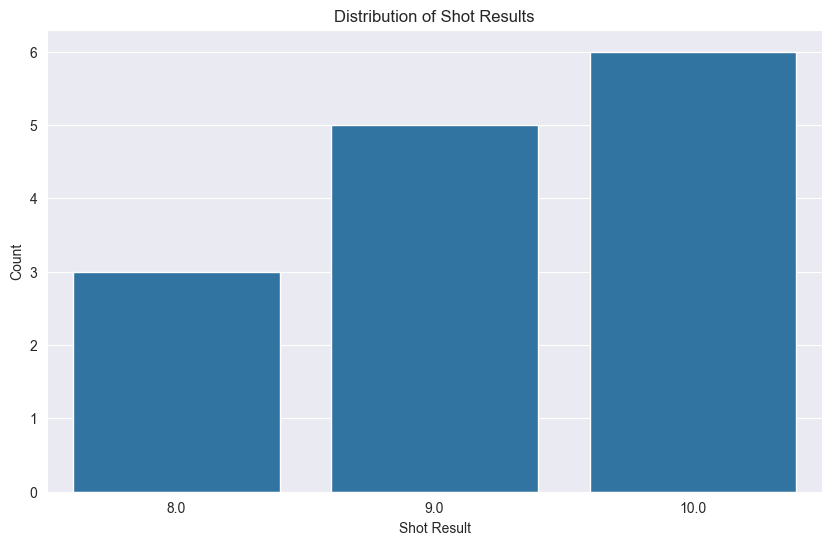

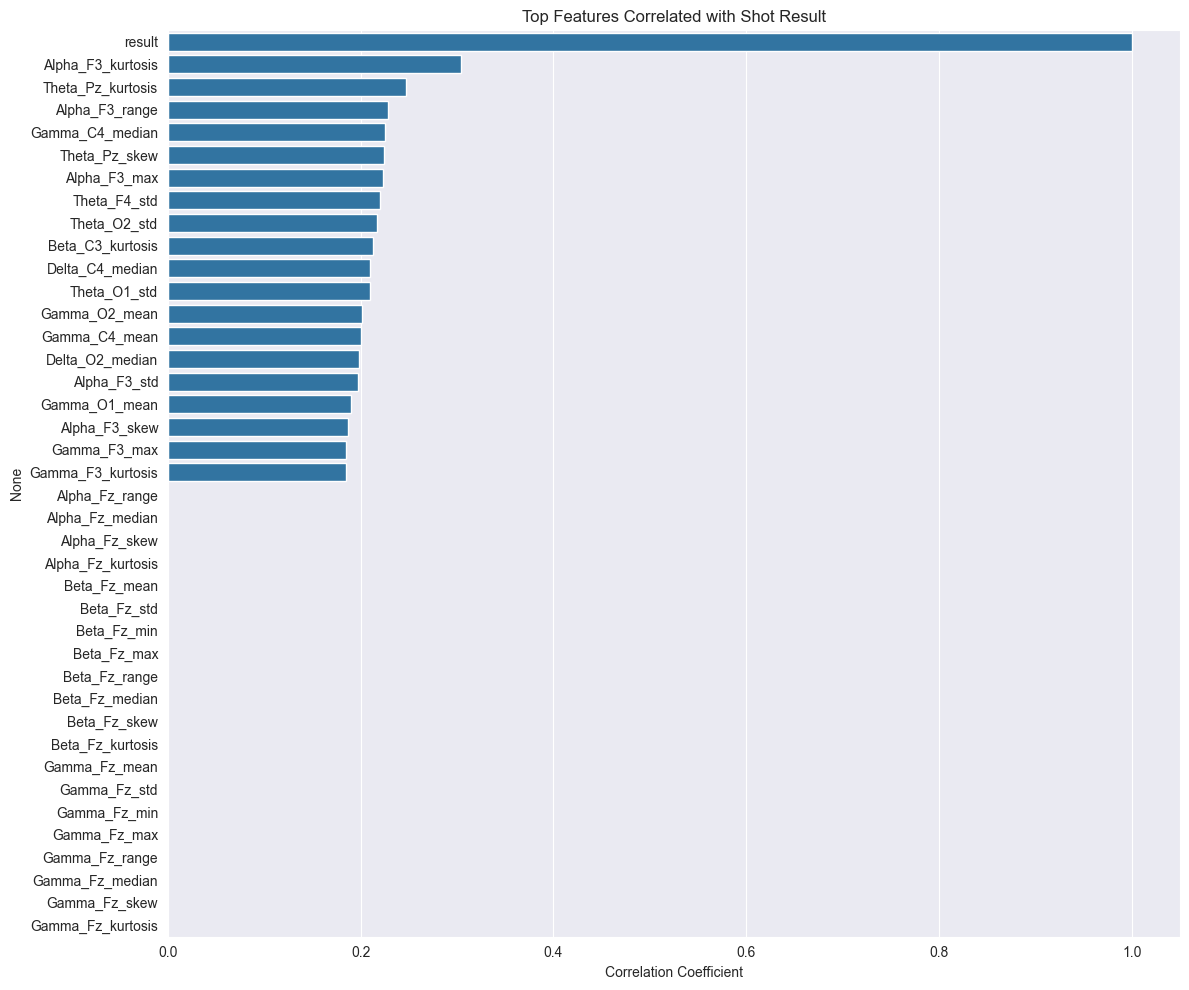

<Figure size 1200x1000 with 0 Axes>

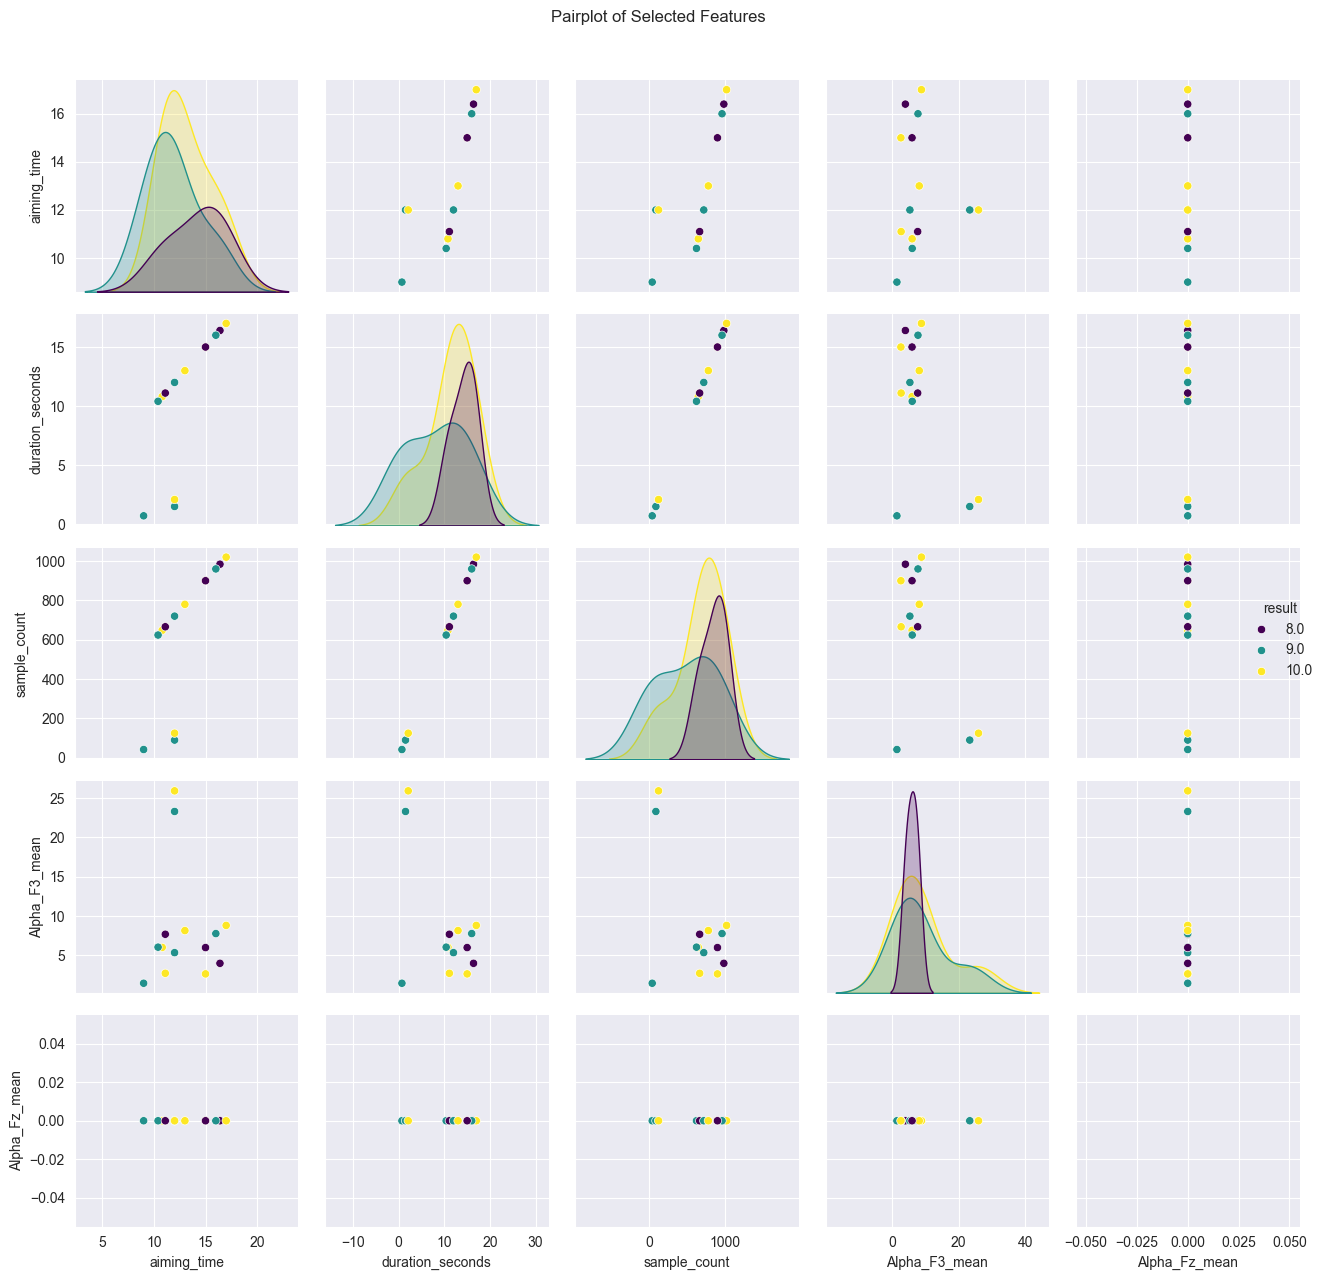

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in the dataset:")
print(combined_features.isnull().sum().sum())

# Basic statistics of the dataset
print("\nBasic statistics:")
print(combined_features.describe())

# Distribution of shot results
plt.figure(figsize=(10, 6))
sns.countplot(x='result', data=combined_features)
plt.title('Distribution of Shot Results')
plt.xlabel('Shot Result')
plt.ylabel('Count')
plt.show()

# Correlation between features and shot result
# First, select only numeric columns
numeric_features = combined_features.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with shot result if it exists in numeric_features
if 'result' in numeric_features.columns:
    # Sort features by correlation with result
    correlations = numeric_features.corr()['result'].sort_values(ascending=False)

    # Plot top 20 positive and negative correlations
    plt.figure(figsize=(12, 10))
    top_correlations = pd.concat([correlations.head(20), correlations.tail(20)])
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title('Top Features Correlated with Shot Result')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

# Pairplot of selected features and result
# Select a few interesting features based on correlation or domain knowledge
selected_features = ['result', 'aiming_time', 'duration_seconds', 'sample_count']

# Add a few EEG features if they exist (e.g., Alpha band features)
alpha_features = [col for col in combined_features.columns if 'Alpha' in col and '_mean' in col]
if alpha_features:
    selected_features.extend(alpha_features[:2])  # Add first two Alpha mean features

# Create pairplot
if len(selected_features) > 1:
    plt.figure(figsize=(12, 10))
    sns.pairplot(combined_features[selected_features], hue='result', palette='viridis')
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.tight_layout()
    plt.show()

## Prepare Dataset for Machine Learning
Now let's prepare the dataset for machine learning models by handling missing values, scaling features, and splitting into training and testing sets.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Function to prepare dataset for ML
def prepare_for_ml(features_df):
    """
    Prepare the feature dataset for machine learning.

    Parameters:
    -----------
    features_df : pandas.DataFrame
        The feature dataset

    Returns:
    --------
    X_train, X_test, y_train, y_test, feature_names
    """
    # Drop non-feature columns
    X = features_df.drop(columns=['shot'])

    # Extract target variable if it exists
    if 'result' in X.columns:
        y = X['result']
        X = X.drop(columns=['result'])
    else:
        y = None

    # Store feature names
    feature_names = X.columns.tolist()

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=feature_names)

    # Split into training and testing sets if target exists
    if y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

        return X_train, X_test, y_train, y_test, feature_names
    else:
        # If no target, just return the processed features
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
        return X, None, None, None, feature_names

# Prepare the combined dataset for ML
if 'result' in combined_features.columns and combined_features['result'].notna().any():
    X_train, X_test, y_train, y_test, feature_names = prepare_for_ml(combined_features)

    print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"Testing set: {X_test.shape[0]} samples, {X_test.shape[1]} features")

    # Display first few rows of the prepared training set
    print("\nFirst few rows of the prepared training set:")
    print(X_train.head())
else:
    print("No valid target variable found in the dataset. Cannot prepare for supervised learning.")

Training set: 11 samples, 323 features
Testing set: 3 samples, 323 features

First few rows of the prepared training set:
   Delta_F3_mean  Delta_F3_std  Delta_F3_min  Delta_F3_max  Delta_F3_range  \
0       0.685202      0.765037     -0.245156      0.960730        1.022032   
1       0.000569      0.193358     -0.245156      0.307119        0.371324   
2       2.423087     -0.693928      3.155057      0.212621       -0.632177   
3      -0.401116     -0.030587     -0.421030     -0.110248        0.002851   
4      -0.782233     -0.431254     -0.391717     -0.779609       -0.671377   

   Delta_F3_median  Delta_F3_skew  Delta_F3_kurtosis  Delta_Fz_mean  \
0         0.735055      -0.187063           0.129139            0.0   
1         0.078756       0.836231           1.024153            0.0   
2         2.537690      -1.862491          -1.025992            0.0   
3        -0.358777       0.124842          -0.064833            0.0   
4        -0.875065       0.007197          -0.690351  

## Feature Importance Analysis
Let's analyze which features are most important for predicting shot results.

Feature ranking:
1. Alpha_F3_skew (0.0728)
2. Alpha_O1_min (0.0611)
3. Alpha_Pz_min (0.0343)
4. Delta_C3_kurtosis (0.0333)
5. Beta_C3_kurtosis (0.0329)
6. Alpha_O2_min (0.0310)
7. Alpha_C4_min (0.0306)
8. Theta_C3_range (0.0276)
9. Theta_C3_min (0.0259)
10. Delta_Pz_min (0.0231)
11. duration_seconds (0.0199)
12. Delta_C3_skew (0.0191)
13. Beta_O1_max (0.0184)
14. Gamma_C3_std (0.0173)
15. Alpha_F3_min (0.0165)
16. Theta_F3_kurtosis (0.0159)
17. Alpha_C4_median (0.0159)
18. Theta_C3_skew (0.0155)
19. Beta_C3_skew (0.0153)
20. Alpha_F3_kurtosis (0.0152)


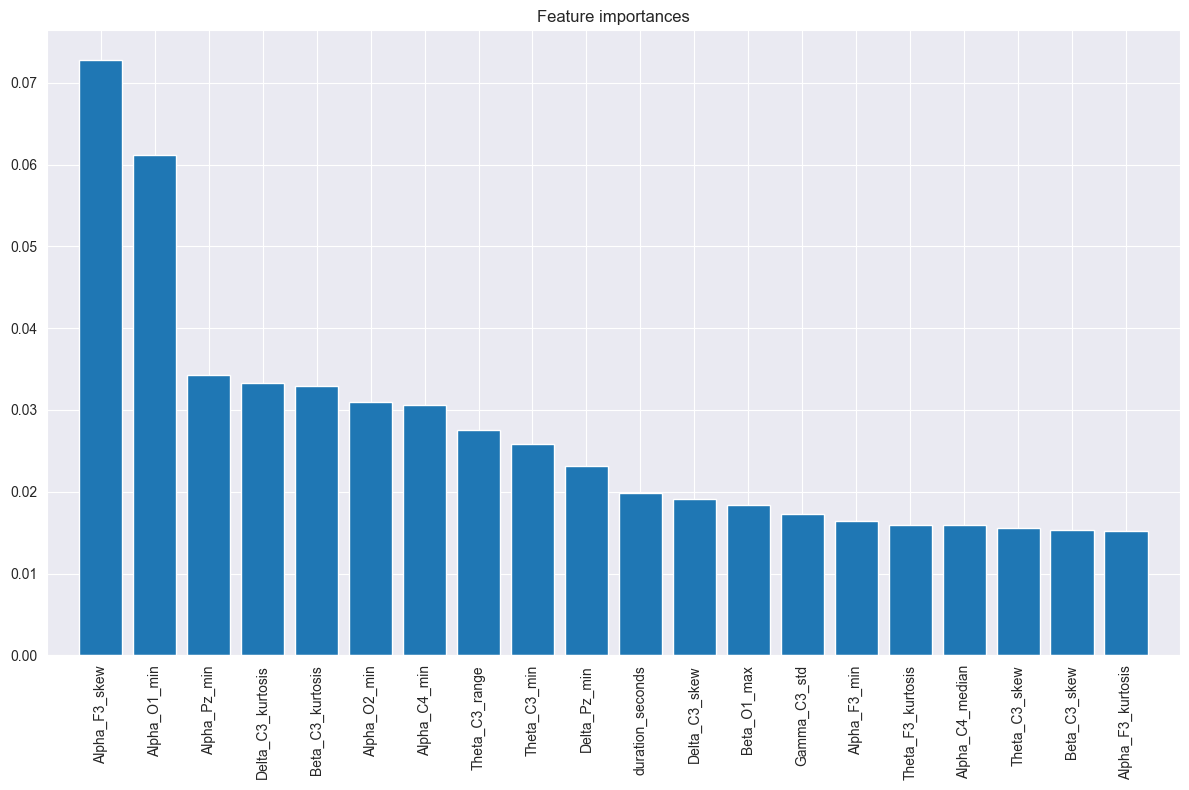


Selected 35 important features:
- Delta_F4_skew
- Delta_C3_mean
- Delta_C3_skew
- Delta_C3_kurtosis
- Delta_C4_kurtosis
- Delta_Pz_min
- Delta_O1_skew
- Delta_O2_skew
- Theta_F3_min
- Theta_F3_kurtosis
- Theta_C3_min
- Theta_C3_range
- Theta_C3_skew
- Theta_C4_min
- Theta_C4_skew
- Theta_Pz_skew
- Theta_O1_kurtosis
- Alpha_F3_min
- Alpha_F3_skew
- Alpha_F3_kurtosis
- Alpha_C4_min
- Alpha_C4_median
- Alpha_Pz_min
- Alpha_Pz_range
- Alpha_O1_min
- Alpha_O2_min
- Beta_C3_max
- Beta_C3_skew
- Beta_C3_kurtosis
- Beta_Pz_min
- Beta_O1_max
- Gamma_C3_std
- Gamma_Pz_kurtosis
- Gamma_O2_min
- duration_seconds


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Check if we have valid target data
if 'y_train' in locals() and y_train is not None and len(y_train) > 0:
    # Train a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print feature ranking
    print("Feature ranking:")
    for f in range(min(20, X_train.shape[1])):
        print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    plt.bar(range(min(20, X_train.shape[1])), 
            importances[indices[:20]],
            align="center")
    plt.xticks(range(min(20, X_train.shape[1])), 
               [feature_names[i] for i in indices[:20]], 
               rotation=90)
    plt.xlim([-1, min(20, X_train.shape[1])])
    plt.tight_layout()
    plt.show()

    # Select most important features
    sfm = SelectFromModel(rf, threshold=0.01)
    sfm.fit(X_train, y_train)

    # Get selected feature names
    selected_features = [feature_names[i] for i in range(len(feature_names)) if sfm.get_support()[i]]
    print(f"\nSelected {len(selected_features)} important features:")
    for feature in selected_features:
        print(f"- {feature}")
else:
    print("No valid target data available for feature importance analysis.")

## Save the Feature Dataset
Let's save the feature dataset for future use.

In [28]:
# Save the combined feature dataset to CSV
combined_features.to_csv('data/combined_features.csv', index=False)
print("Saved combined feature dataset to 'data/combined_features.csv'")

# Save the individual feature datasets
features_serie1.to_csv('data/features_serie1.csv', index=False)
print("Saved Serie1 feature dataset to 'data/features_serie1.csv'")

features_serie2.to_csv('data/features_serie2.csv', index=False)
print("Saved Serie2 feature dataset to 'data/features_serie2.csv'")

Saved combined feature dataset to 'data/combined_features.csv'
Saved Serie1 feature dataset to 'data/features_serie1.csv'
Saved Serie2 feature dataset to 'data/features_serie2.csv'


## Train and Evaluate Machine Learning Models
Now let's train and evaluate several machine learning models to predict shot results.


Training Linear Regression...
Test MSE: 1.2914
Test RMSE: 1.1364
Test MAE: 1.1057
Test R2: -0.9371
Cross-validation RMSE: 1.3826
Cross-validation R2: -1.7175


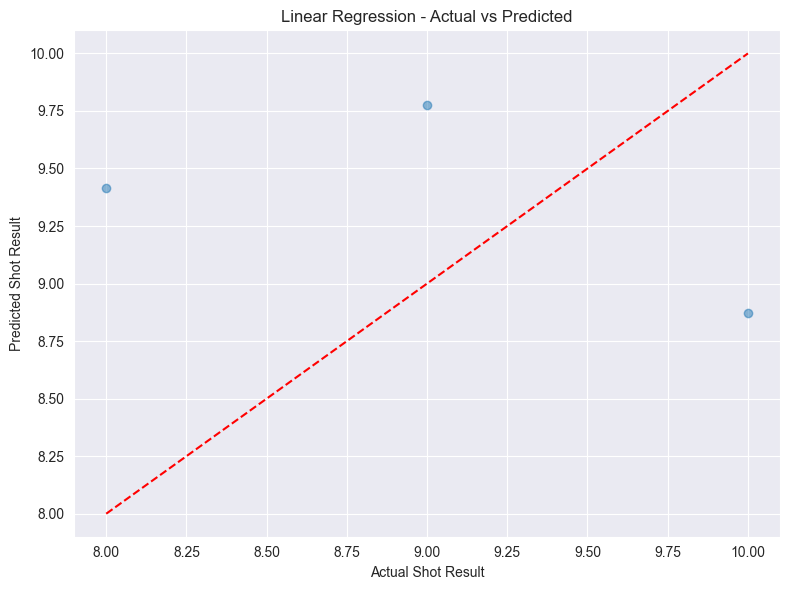


Training Ridge Regression...
Test MSE: 1.2820
Test RMSE: 1.1322
Test MAE: 1.0997
Test R2: -0.9229
Cross-validation RMSE: 1.3701
Cross-validation R2: -1.6726


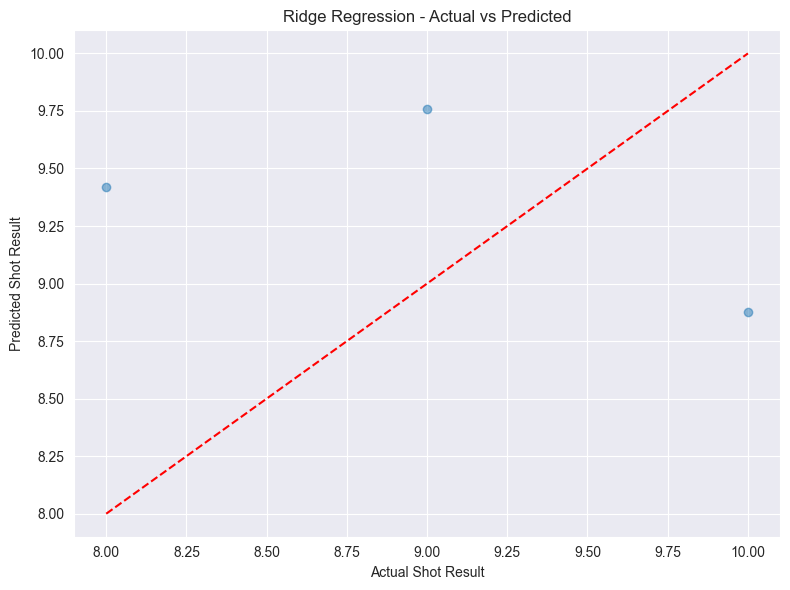


Training Lasso Regression...
Test MSE: 1.0604
Test RMSE: 1.0298
Test MAE: 0.8835
Test R2: -0.5906
Cross-validation RMSE: 1.1216
Cross-validation R2: -1.0962


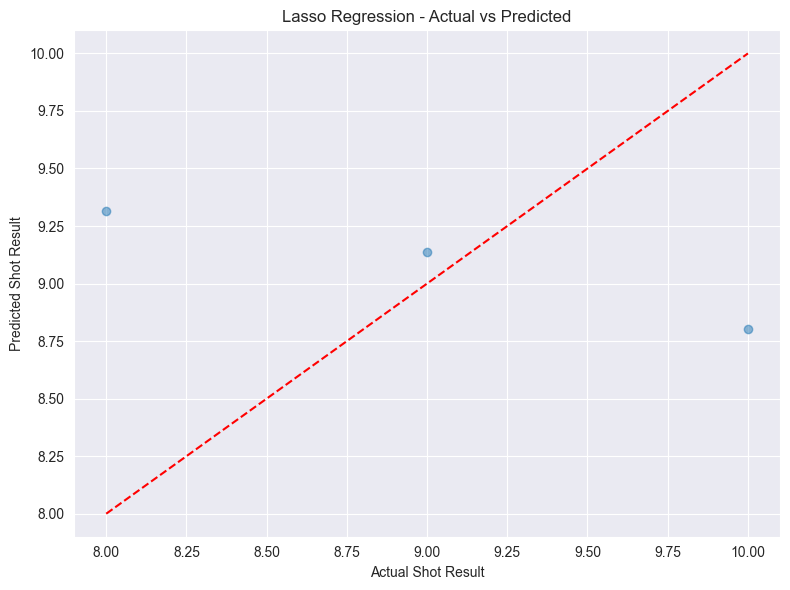


Training Random Forest...
Test MSE: 0.8361
Test RMSE: 0.9144
Test MAE: 0.7600
Test R2: -0.2541
Cross-validation RMSE: 0.8045
Cross-validation R2: -0.1759


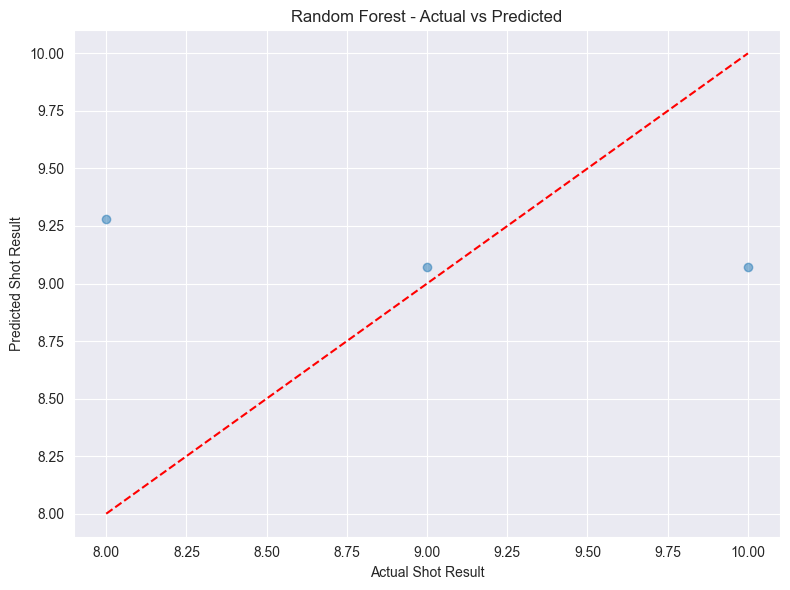


Training Gradient Boosting...
Test MSE: 0.7356
Test RMSE: 0.8577
Test MAE: 0.8452
Test R2: -0.1034
Cross-validation RMSE: 1.1087
Cross-validation R2: -0.8562


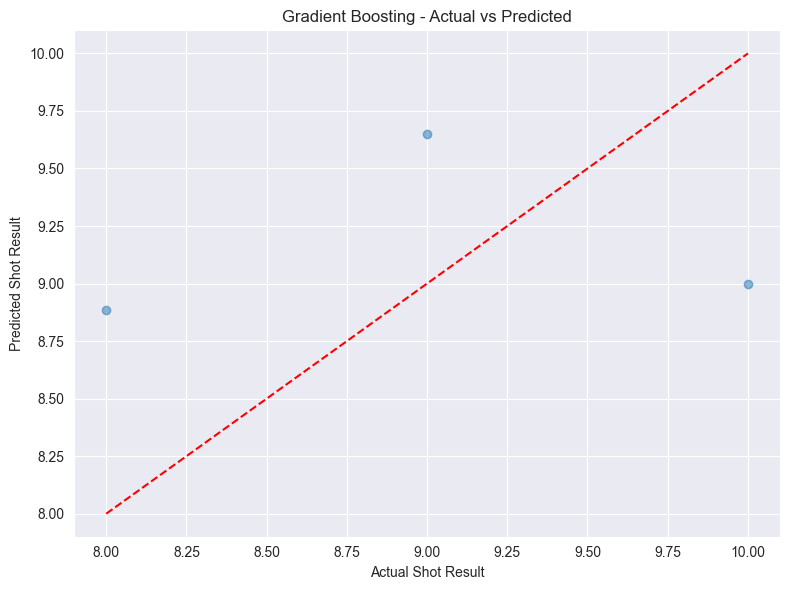


Training SVR...
Test MSE: 1.2850
Test RMSE: 1.1336
Test MAE: 0.9936
Test R2: -0.9274
Cross-validation RMSE: 0.7885
Cross-validation R2: -0.1239


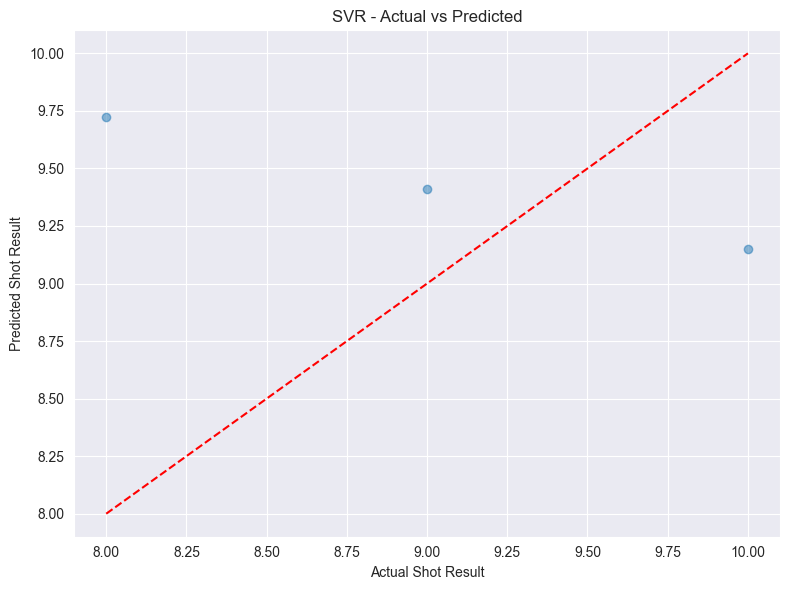


Model Comparison:
               Model       MSE      RMSE       MAE        R2   CV_RMSE  \
0  Linear Regression  1.291378  1.136388  1.105714 -0.937066  1.382649   
1   Ridge Regression  1.281951  1.132233  1.099746 -0.922926  1.370134   
2   Lasso Regression  1.060392  1.029753  0.883490 -0.590588  1.121644   
3      Random Forest  0.836067  0.914367  0.760000 -0.254100  0.804511   
4  Gradient Boosting  0.735620  0.857683  0.845210 -0.103430  1.108742   
5                SVR  1.284953  1.133558  0.993613 -0.927429  0.788491   

      CV_R2  
0 -1.717459  
1 -1.672594  
2 -1.096166  
3 -0.175860  
4 -0.856235  
5 -0.123912  


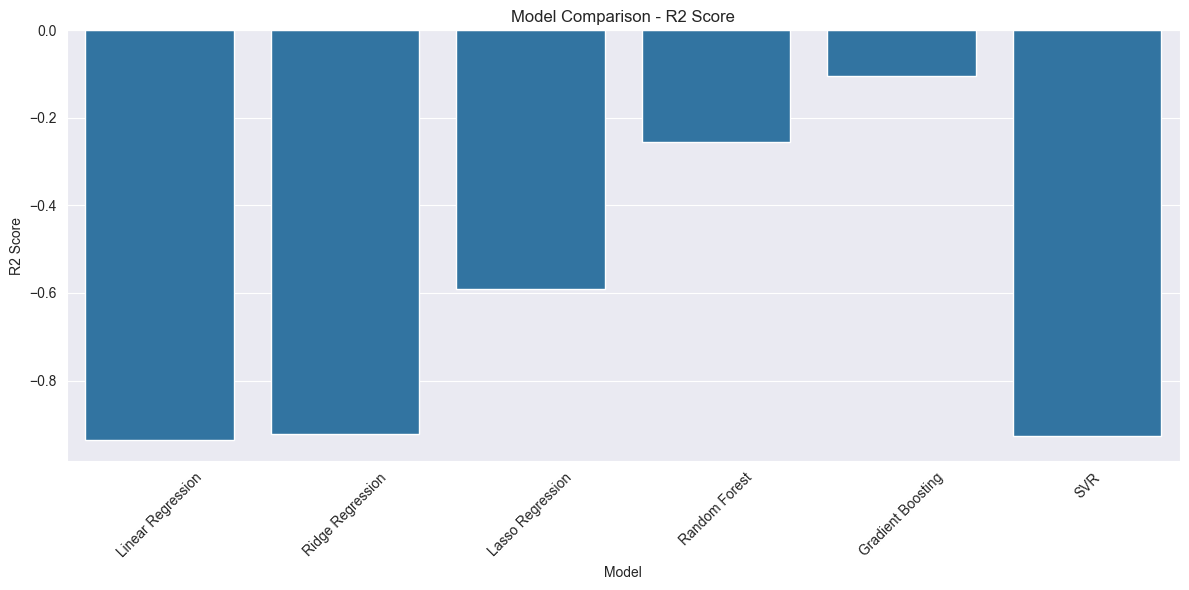

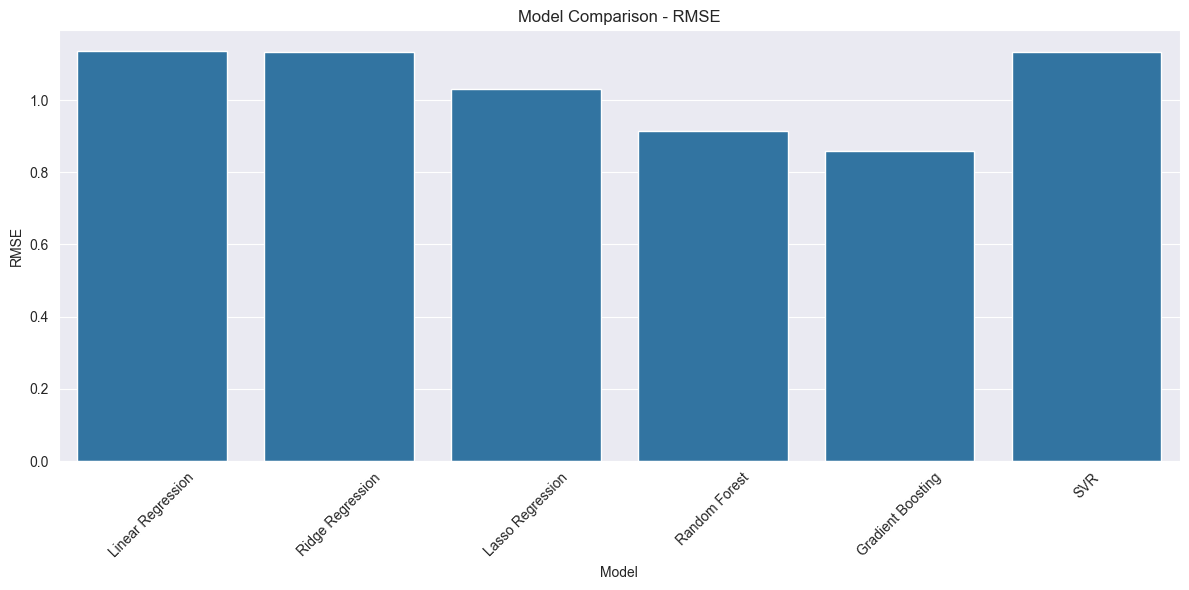


Best model based on R2 score: Gradient Boosting
R2 score: -0.1034
RMSE: 0.8577


In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Check if we have valid training data
if 'X_train' in locals() and 'y_train' in locals() and X_train is not None and y_train is not None:
    # Define models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf')
    }

    # Dictionary to store results
    results = {
        'Model': [],
        'MSE': [],
        'RMSE': [],
        'MAE': [],
        'R2': [],
        'CV_RMSE': [],
        'CV_R2': []
    }

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Cross-validation
        cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, 
                                          scoring='neg_mean_squared_error', 
                                          cv=5)).mean()
        cv_r2 = cross_val_score(model, X_train, y_train, 
                               scoring='r2', 
                               cv=5).mean()

        # Store results
        results['Model'].append(name)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAE'].append(mae)
        results['R2'].append(r2)
        results['CV_RMSE'].append(cv_rmse)
        results['CV_R2'].append(cv_r2)

        # Print results
        print(f"Test MSE: {mse:.4f}")
        print(f"Test RMSE: {rmse:.4f}")
        print(f"Test MAE: {mae:.4f}")
        print(f"Test R2: {r2:.4f}")
        print(f"Cross-validation RMSE: {cv_rmse:.4f}")
        print(f"Cross-validation R2: {cv_r2:.4f}")

        # Plot actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual Shot Result')
        plt.ylabel('Predicted Shot Result')
        plt.title(f'{name} - Actual vs Predicted')
        plt.tight_layout()
        plt.show()

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    print("\nModel Comparison:")
    print(results_df)

    # Plot model comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='R2', data=results_df)
    plt.title('Model Comparison - R2 Score')
    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='RMSE', data=results_df)
    plt.title('Model Comparison - RMSE')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Find the best model
    best_model_idx = results_df['R2'].idxmax()
    best_model_name = results_df.loc[best_model_idx, 'Model']
    print(f"\nBest model based on R2 score: {best_model_name}")
    print(f"R2 score: {results_df.loc[best_model_idx, 'R2']:.4f}")
    print(f"RMSE: {results_df.loc[best_model_idx, 'RMSE']:.4f}")
else:
    print("No valid training data available for model training and evaluation.")

## Prepare Serie3 Data for Prediction
Now let's extract features from Serie3 data and use our best model to predict the shot results.

Creating feature dataset for Serie3...
Created dataset with 9 shots and 325 features
Saved Serie3 feature dataset to 'data/features_serie3.csv'

Serie3 Prediction Metrics:
MSE: 0.7669
RMSE: 0.8757
MAE: 0.6407
R2: -0.1503


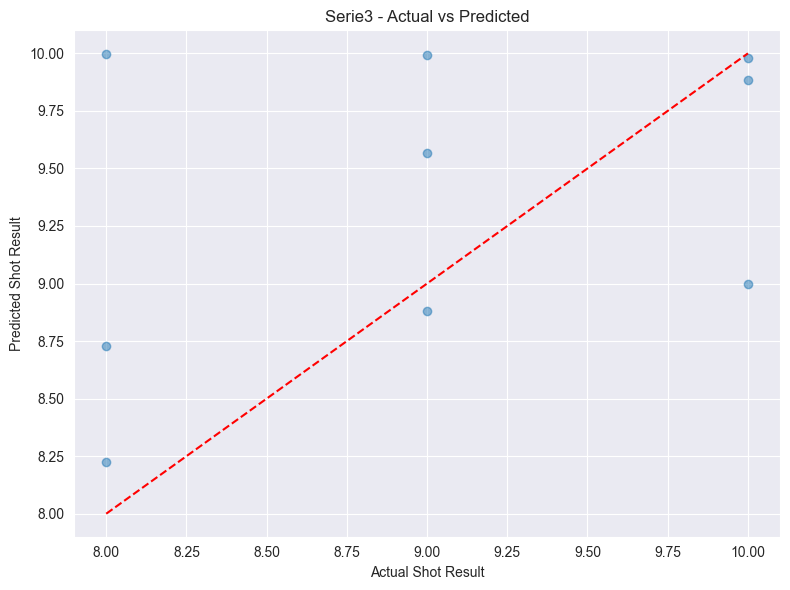


Serie3 Predictions:
     shot  predicted_result  actual_result
0   hit 2          8.881825            9.0
1   hit 3          9.883288           10.0
2   hit 4          9.000007           10.0
3   hit 5          9.995084            8.0
4   hit 6          9.993990            9.0
5   hit 7          8.730161            8.0
6   hit 8          9.979392           10.0
7   hit 9          8.224739            8.0
8  hit 10          9.567209            9.0
Saved Serie3 predictions to 'data/serie3_predictions.csv'


In [30]:
# Extract features from Serie3
print("Creating feature dataset for Serie3...")
features_serie3 = create_feature_dataset(clean_serie3, metadata_serie3)
print(f"Created dataset with {len(features_serie3)} shots and {features_serie3.shape[1]} features")

# Save Serie3 features
features_serie3.to_csv('data/features_serie3.csv', index=False)
print("Saved Serie3 feature dataset to 'data/features_serie3.csv'")

# Check if we have valid Serie3 data
if len(features_serie3) > 0:
    # Prepare Serie3 data for prediction
    # Drop non-feature columns
    X_serie3 = features_serie3.drop(columns=['shot'])

    # If the result column exists, save it for comparison
    if 'result' in X_serie3.columns:
        y_serie3 = X_serie3['result']
        X_serie3 = X_serie3.drop(columns=['result'])
    else:
        y_serie3 = None

    # Ensure X_serie3 has the same features as X_train
    missing_cols = set(feature_names) - set(X_serie3.columns)
    for col in missing_cols:
        X_serie3[col] = 0  # Add missing columns with default values

    # Ensure columns are in the same order
    X_serie3 = X_serie3[feature_names]

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_serie3 = pd.DataFrame(imputer.fit_transform(X_serie3), columns=feature_names)

    # Scale features using the same scaler as for training data
    scaler = StandardScaler()
    X_serie3 = pd.DataFrame(scaler.fit_transform(X_serie3), columns=feature_names)

    # If we have trained models, use the best one to predict Serie3 results
    if 'models' in locals() and best_model_name in models:
        best_model = models[best_model_name]

        # Make predictions
        y_pred_serie3 = best_model.predict(X_serie3)

        # Create a DataFrame with predictions
        predictions_df = pd.DataFrame({
            'shot': features_serie3['shot'],
            'predicted_result': y_pred_serie3
        })

        # If we have actual results, add them for comparison
        if y_serie3 is not None:
            predictions_df['actual_result'] = y_serie3

            # Calculate metrics
            mse = mean_squared_error(y_serie3, y_pred_serie3)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_serie3, y_pred_serie3)
            r2 = r2_score(y_serie3, y_pred_serie3)

            print("\nSerie3 Prediction Metrics:")
            print(f"MSE: {mse:.4f}")
            print(f"RMSE: {rmse:.4f}")
            print(f"MAE: {mae:.4f}")
            print(f"R2: {r2:.4f}")

            # Plot actual vs predicted values
            plt.figure(figsize=(8, 6))
            plt.scatter(y_serie3, y_pred_serie3, alpha=0.5)
            plt.plot([y_serie3.min(), y_serie3.max()], [y_serie3.min(), y_serie3.max()], 'r--')
            plt.xlabel('Actual Shot Result')
            plt.ylabel('Predicted Shot Result')
            plt.title('Serie3 - Actual vs Predicted')
            plt.tight_layout()
            plt.show()

        # Display predictions
        print("\nSerie3 Predictions:")
        print(predictions_df)

        # Save predictions
        predictions_df.to_csv('data/serie3_predictions.csv', index=False)
        print("Saved Serie3 predictions to 'data/serie3_predictions.csv'")
    else:
        print("No trained models available for prediction.")
else:
    print("No valid Serie3 data available for prediction.")

## Frequency Band Comparison Across Series
Now let's compare the frequency bands (Beta, Theta, Gamma) across all three series to understand how brain activity differs between training and competition.

Found data for the following bands: Beta, Theta, Gamma


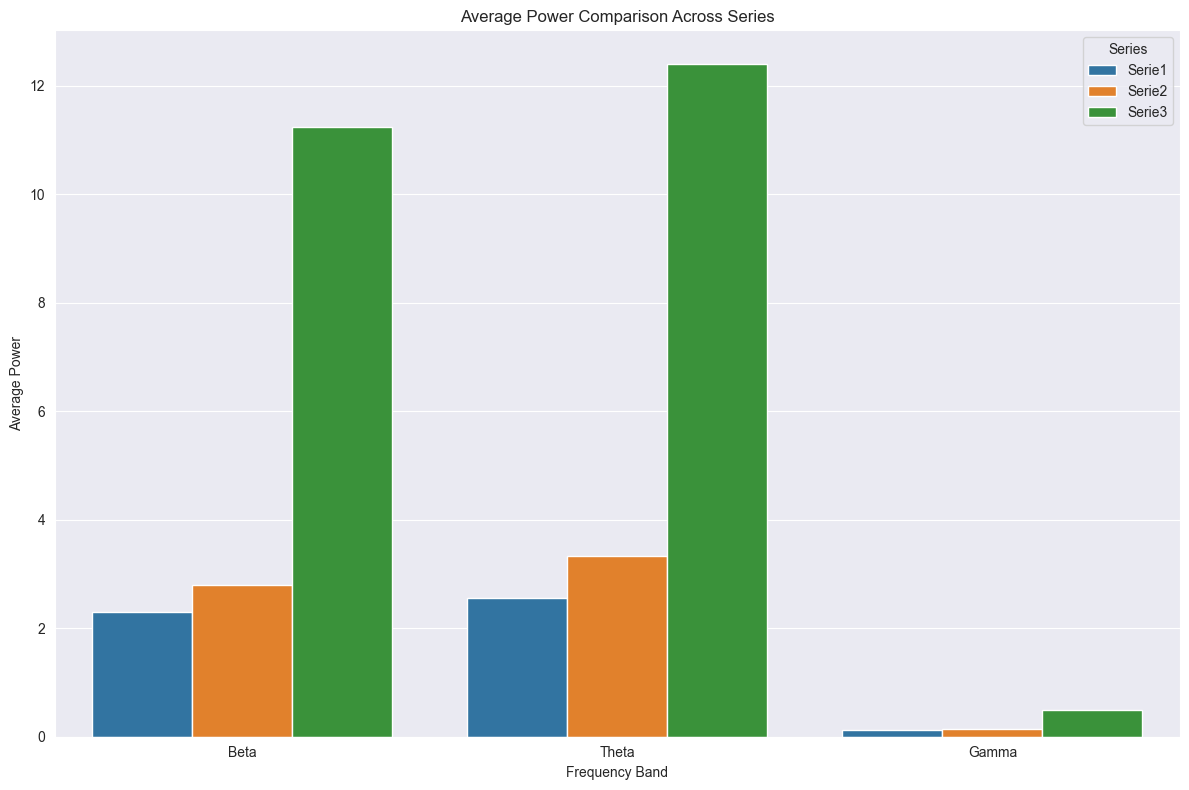

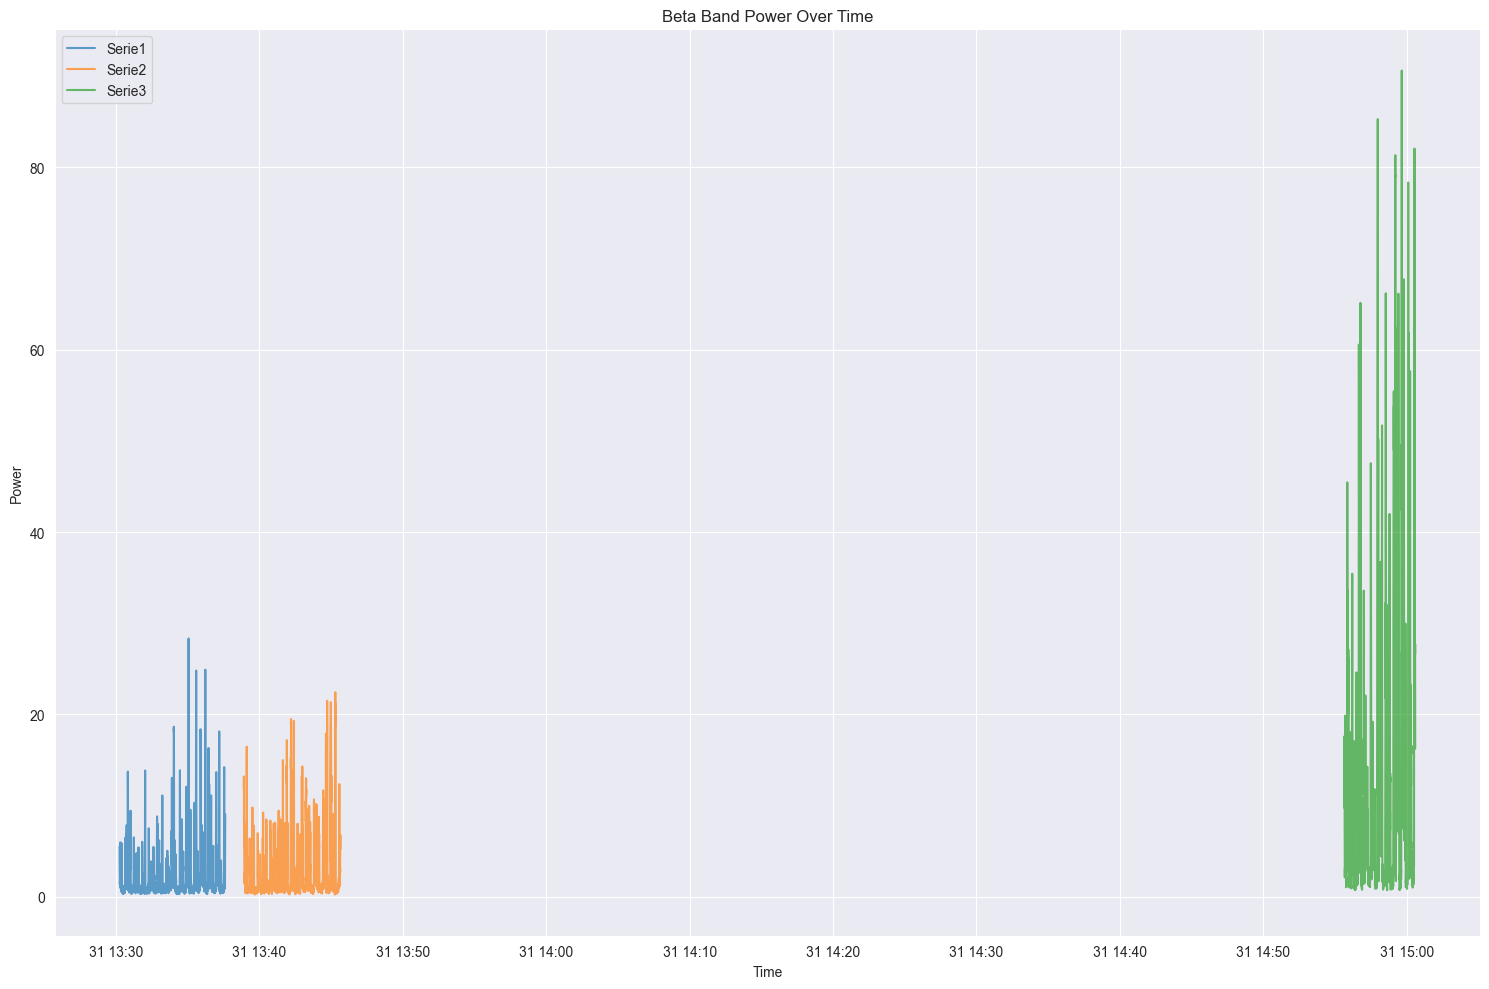

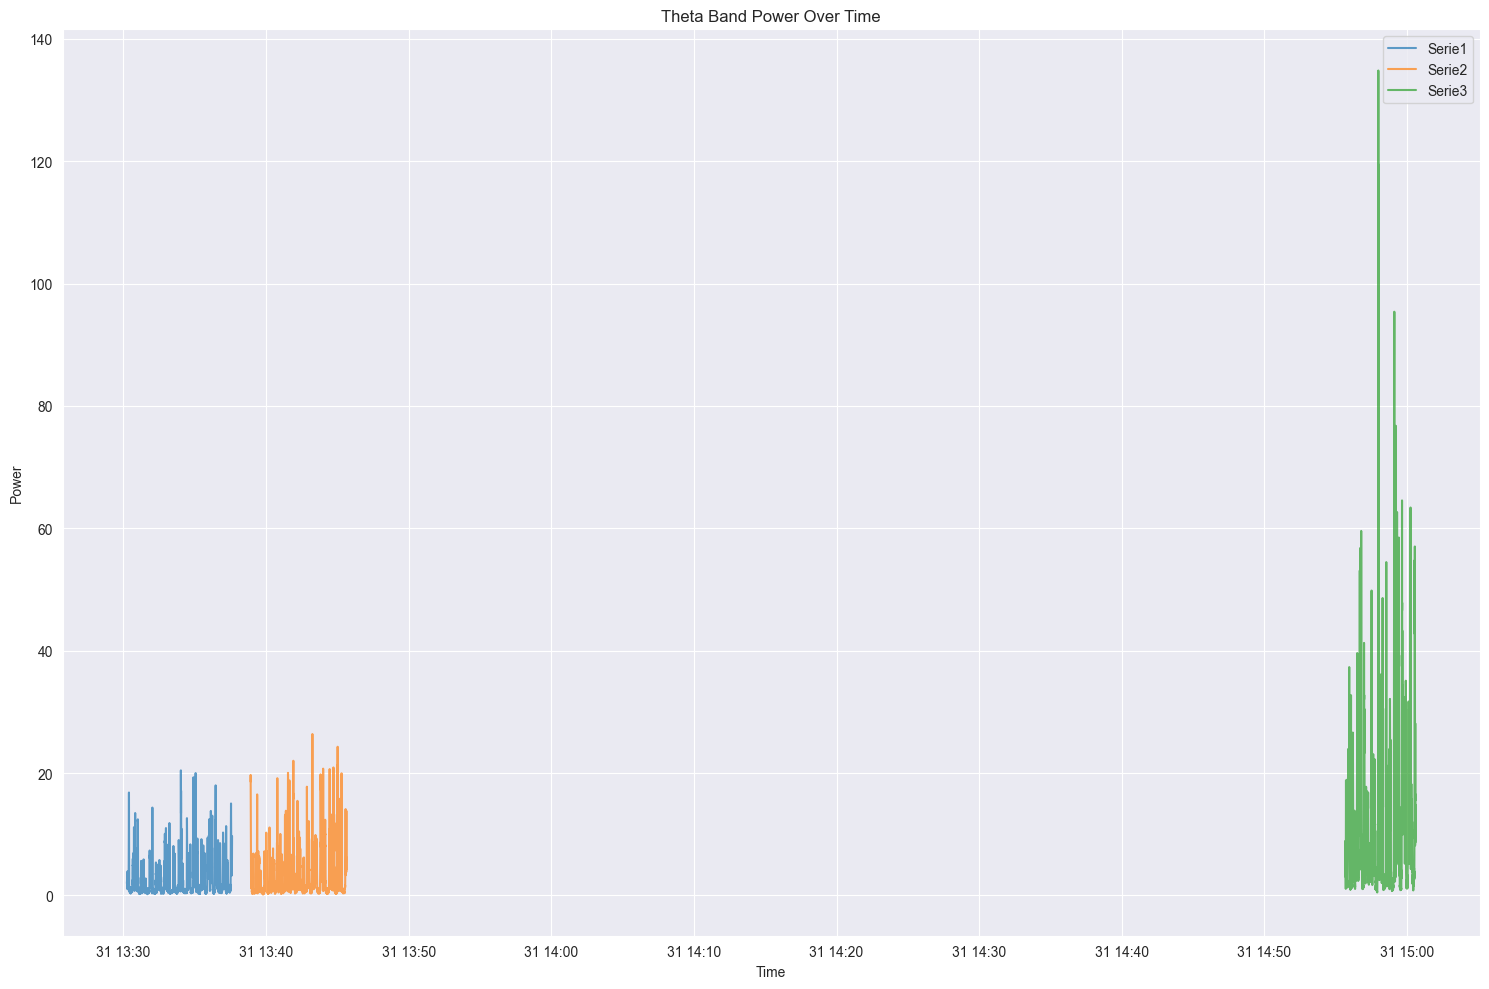

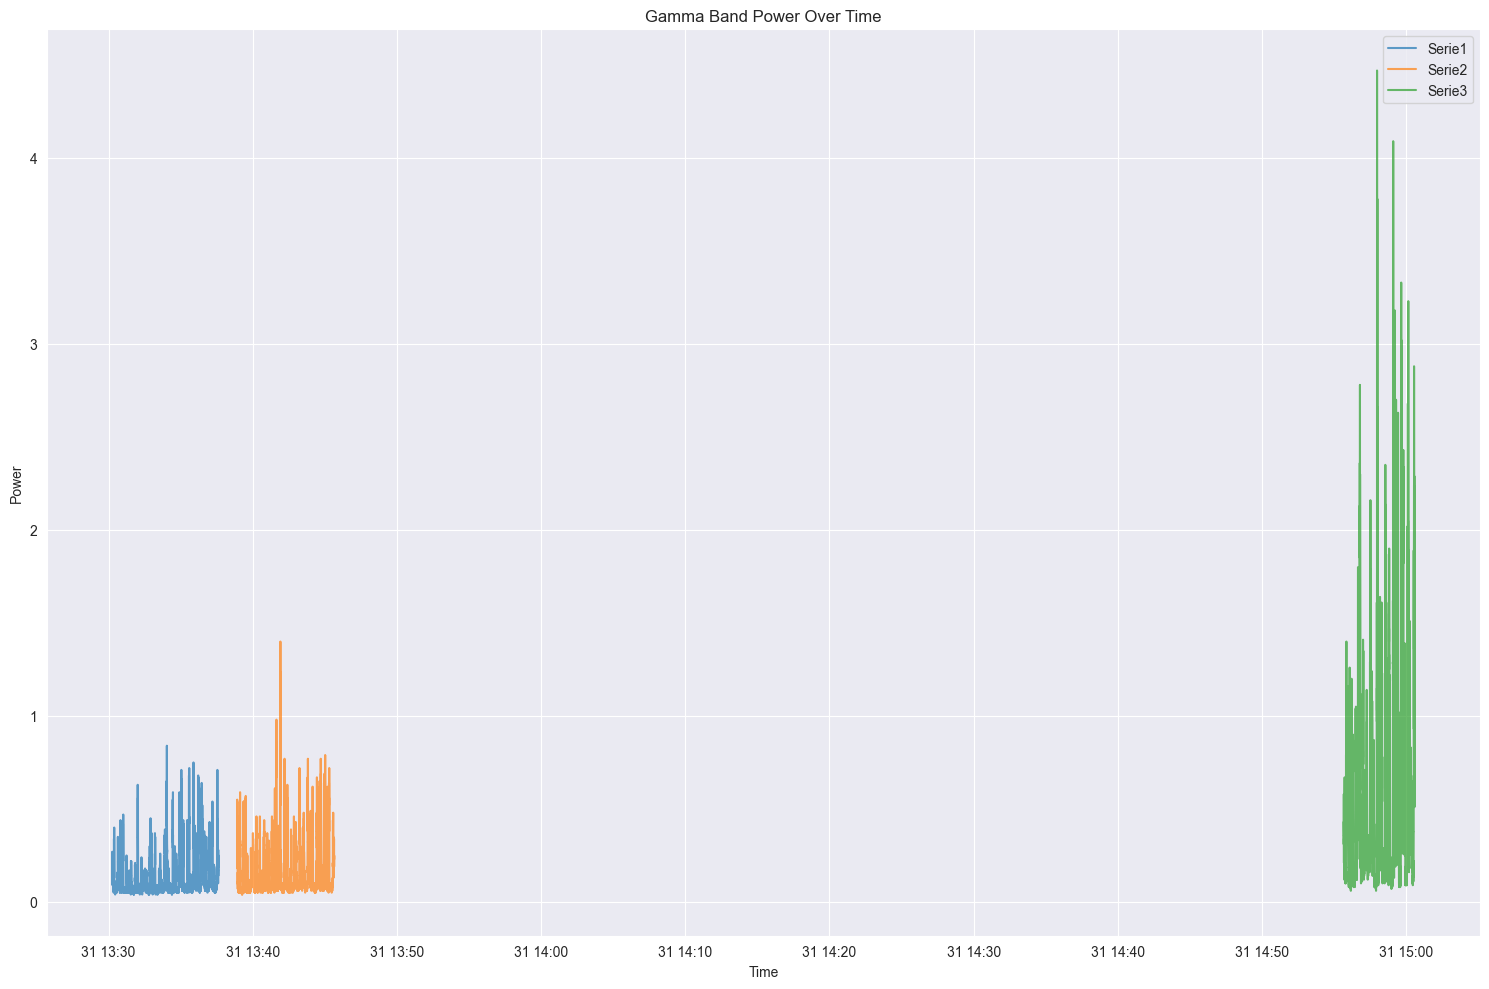


Statistical Comparison Between Series:

Beta Band:
  Serie1 Average Power: 2.2895
  Serie2 Average Power: 2.8012
  Serie3 Average Power: 11.2348
  Percent Change from Training to Competition: 341.39%

Theta Band:
  Serie1 Average Power: 2.5639
  Serie2 Average Power: 3.3373
  Serie3 Average Power: 12.3971
  Percent Change from Training to Competition: 320.16%

Gamma Band:
  Serie1 Average Power: 0.1157
  Serie2 Average Power: 0.1453
  Serie3 Average Power: 0.4989
  Percent Change from Training to Competition: 282.29%


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Function to extract band data from EEG dataframe
def extract_band_data(eeg_df, band_name):
    """
    Extracts specific band data from an EEG DataFrame.

    Given a DataFrame containing EEG data, this function isolates and extracts data
    pertaining to a specified frequency band. It returns a new DataFrame containing
    only the time column and the columns corresponding to the specified frequency
    band. If no such columns are found, an empty DataFrame is returned.

    Args:
        eeg_df (pd.DataFrame): A pandas DataFrame containing EEG data. The DataFrame
            is expected to have a 'Time' column and other columns named such that
            the specified band name is a substring.
        band_name (str): The name of the EEG band to extract. This should match
            the substring present in the relevant columns of the DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the 'Time' column and any columns whose
        names contain the specified band. If no matching columns are found, returns
        an empty DataFrame.
    """
    # Get all columns that contain the band name
    band_cols = [col for col in eeg_df.columns if band_name in col]

    # If no columns found, return empty DataFrame
    if not band_cols:
        return pd.DataFrame()

    # Return DataFrame with Time and band columns
    return eeg_df[['Time'] + band_cols]

# Extract band data for each series
# Beta band
beta_serie1 = extract_band_data(clean_serie1, 'Beta')
beta_serie2 = extract_band_data(clean_serie2, 'Beta')
beta_serie3 = extract_band_data(clean_serie3, 'Beta')

# Theta band
theta_serie1 = extract_band_data(clean_serie1, 'Theta')
theta_serie2 = extract_band_data(clean_serie2, 'Theta')
theta_serie3 = extract_band_data(clean_serie3, 'Theta')

# Gamma band
gamma_serie1 = extract_band_data(clean_serie1, 'Gamma')
gamma_serie2 = extract_band_data(clean_serie2, 'Gamma')
gamma_serie3 = extract_band_data(clean_serie3, 'Gamma')

# Check if we have data for each band
bands_found = []
if not beta_serie1.empty and not beta_serie2.empty and not beta_serie3.empty:
    bands_found.append('Beta')
if not theta_serie1.empty and not theta_serie2.empty and not theta_serie3.empty:
    bands_found.append('Theta')
if not gamma_serie1.empty and not gamma_serie2.empty and not gamma_serie3.empty:
    bands_found.append('Gamma')

print(f"Found data for the following bands: {', '.join(bands_found)}")

# If no bands found, try to identify what bands are available
if not bands_found:
    # Get unique band names from column headers
    all_bands = set()
    for col in clean_serie1.columns:
        if '_' in col:
            band = col.split('_')[0]
            if band != 'Time':
                all_bands.add(band)

    print(f"No Beta, Theta, or Gamma bands found. Available bands: {', '.join(all_bands)}")

    # Use the first three available bands instead
    available_bands = list(all_bands)[:3]

    # Extract data for available bands
    for band in available_bands:
        globals()[f"{band.lower()}_serie1"] = extract_band_data(clean_serie1, band)
        globals()[f"{band.lower()}_serie2"] = extract_band_data(clean_serie2, band)
        globals()[f"{band.lower()}_serie3"] = extract_band_data(clean_serie3, band)

    bands_found = available_bands

# Function to calculate average power for each band
def calculate_band_power(band_df):
    """
    Calculate the average power across all frequencies for a band.

    Parameters:
    -----------
    band_df : pandas.DataFrame
        DataFrame containing band data

    Returns:
    --------
    float
        Average power across all frequencies
    """
    if band_df.empty:
        return 0

    # Skip the Time column
    data_cols = [col for col in band_df.columns if col != 'Time']

    # Calculate mean across all data columns
    return band_df[data_cols].mean().mean()

# Calculate average power for each band and series
band_powers = {
    'Serie': [],
    'Band': [],
    'Average Power': []
}

for band in bands_found:
    band_lower = band.lower()

    # Serie1
    power = calculate_band_power(globals()[f"{band_lower}_serie1"])
    band_powers['Serie'].append('Serie1')
    band_powers['Band'].append(band)
    band_powers['Average Power'].append(power)

    # Serie2
    power = calculate_band_power(globals()[f"{band_lower}_serie2"])
    band_powers['Serie'].append('Serie2')
    band_powers['Band'].append(band)
    band_powers['Average Power'].append(power)

    # Serie3
    power = calculate_band_power(globals()[f"{band_lower}_serie3"])
    band_powers['Serie'].append('Serie3')
    band_powers['Band'].append(band)
    band_powers['Average Power'].append(power)

# Convert to DataFrame
band_powers_df = pd.DataFrame(band_powers)

# Plot average power comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Band', y='Average Power', hue='Serie', data=band_powers_df)
plt.title('Average Power Comparison Across Series')
plt.xlabel('Frequency Band')
plt.ylabel('Average Power')
plt.legend(title='Series')
plt.tight_layout()
plt.show()

# Plot time series for each band
for band in bands_found:
    band_lower = band.lower()

    plt.figure(figsize=(15, 10))

    # Get band DataFrames
    band_serie1 = globals()[f"{band_lower}_serie1"]
    band_serie2 = globals()[f"{band_lower}_serie2"]
    band_serie3 = globals()[f"{band_lower}_serie3"]

    # Skip if any DataFrame is empty
    if band_serie1.empty or band_serie2.empty or band_serie3.empty:
        continue

    # Get first data column for each series (excluding Time)
    col_serie1 = [col for col in band_serie1.columns if col != 'Time'][0]
    col_serie2 = [col for col in band_serie2.columns if col != 'Time'][0]
    col_serie3 = [col for col in band_serie3.columns if col != 'Time'][0]

    # Plot time series
    plt.plot(band_serie1['Time'], band_serie1[col_serie1], label='Serie1', alpha=0.7)
    plt.plot(band_serie2['Time'], band_serie2[col_serie2], label='Serie2', alpha=0.7)
    plt.plot(band_serie3['Time'], band_serie3[col_serie3], label='Serie3', alpha=0.7)

    plt.title(f'{band} Band Power Over Time')
    plt.xlabel('Time')
    plt.ylabel('Power')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Statistical comparison between series
print("\nStatistical Comparison Between Series:")
for band in bands_found:
    band_lower = band.lower()

    # Get band DataFrames
    band_serie1 = globals()[f"{band_lower}_serie1"]
    band_serie2 = globals()[f"{band_lower}_serie2"]
    band_serie3 = globals()[f"{band_lower}_serie3"]

    # Skip if any DataFrame is empty
    if band_serie1.empty or band_serie2.empty or band_serie3.empty:
        continue

    # Calculate average power for each series
    power_serie1 = calculate_band_power(band_serie1)
    power_serie2 = calculate_band_power(band_serie2)
    power_serie3 = calculate_band_power(band_serie3)

    print(f"\n{band} Band:")
    print(f"  Serie1 Average Power: {power_serie1:.4f}")
    print(f"  Serie2 Average Power: {power_serie2:.4f}")
    print(f"  Serie3 Average Power: {power_serie3:.4f}")

    # Calculate percent change from training to competition
    avg_training = (power_serie1 + power_serie2) / 2
    percent_change = ((power_serie3 - avg_training) / avg_training) * 100

    print(f"  Percent Change from Training to Competition: {percent_change:.2f}%")


## MNE Scalp Topograph Visualization
Now let's create scalp topograph visualizations using the MNE framework to visualize brain activity for Beta, Theta, and Gamma bands across all three series.

In [32]:
# Import MNE
import mne
from mne.channels import make_standard_montage
import numpy as np

# Function to create MNE raw object from EEG data
def create_mne_raw(eeg_df, band_name):
    """
    Create an MNE raw object from EEG data for a specific band.

    Parameters:
    -----------
    eeg_df : pandas.DataFrame
        The EEG data with frequency band columns
    band_name : str
        The name of the frequency band to extract

    Returns:
    --------
    mne.io.Raw
        MNE raw object for the specified band
    """
    # Extract band data
    band_df = extract_band_data(eeg_df, band_name)

    if band_df.empty:
        return None

    # Get data columns (excluding Time)
    data_cols = [col for col in band_df.columns if col != 'Time']

    # Print column names for debugging
    print(f"Columns for {band_name}:")
    for col in data_cols[:5]:  # Print first 5 columns to avoid cluttering output
        print(f"  {col}")

    # Extract channel names from column headers
    ch_names = []
    for col in data_cols:
        # Assuming format is "Band_Frequency_Channel" or "Band_Channel"
        parts = col.split('_')
        if len(parts) > 2:
            # For format like "Beta_13Hz_F3", extract just "F3"
            ch_name = parts[2]
        elif len(parts) == 2:
            # For format like "Beta_F3", extract just "F3"
            ch_name = parts[1]
        else:
            # If no channel info, use the column name
            ch_name = col
        ch_names.append(ch_name)

    # If no channel names found, create generic ones
    if not ch_names or all(name == ch_names[0] for name in ch_names):
        ch_names = [f'CH{i+1}' for i in range(len(data_cols))]

    # Print extracted channel names for debugging
    print(f"Extracted channel names for {band_name}:")
    print(f"  {ch_names[:5]}...")

    # Check if channel names still include the band name (e.g., 'Beta_F3')
    # This can happen if the column format is unexpected
    for i, ch in enumerate(ch_names):
        if ch.startswith(f"{band_name}_"):
            # Strip off the band name prefix
            ch_names[i] = ch[len(band_name)+1:]

    # Handle specific channels mentioned in the error message
    problem_channels = [f'{band_name}_F3', f'{band_name}_Fz', f'{band_name}_F4', 
                        f'{band_name}_C3', f'{band_name}_C4', f'{band_name}_Pz', 
                        f'{band_name}_O1', f'{band_name}_O2']

    # Check if any of the data columns match the problem channels
    for i, col in enumerate(data_cols):
        if col in problem_channels:
            # Extract the channel name (after the band name and underscore)
            ch_names[i] = col.split('_')[1]

    # Try to map channel names to standard 10-20 system names
    # This handles cases where the channel names might be in a different format
    standard_10_20 = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
    for i, ch in enumerate(ch_names):
        # Try to find a matching standard channel name (case-insensitive)
        for std_ch in standard_10_20:
            if ch.upper() == std_ch.upper():
                ch_names[i] = std_ch
                break

    # Print cleaned channel names
    print(f"Final channel names for {band_name}:")
    print(f"  {ch_names[:5]}...")

    # Extract data
    data = band_df[data_cols].values.T  # Transpose to get channels x time

    # Create info object
    info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types='eeg')

    # Create raw object
    raw = mne.io.RawArray(data, info)

    # Set montage (try different montage types)
    montage_types = ['standard_1020', 'standard_1005', 'standard_1010', 'biosemi64']
    success = False

    for montage_type in montage_types:
        try:
            print(f"Trying montage: {montage_type}")
            montage = make_standard_montage(montage_type)

            # Check if all channel names are in this montage
            standard_ch_names = montage.ch_names
            missing_channels = [ch for ch in ch_names if ch not in standard_ch_names]

            if missing_channels:
                print(f"Warning: {len(missing_channels)} channels are not in the {montage_type} montage.")
                if len(missing_channels) <= 5:  # Only print if there aren't too many
                    print(f"Missing channels: {missing_channels}")

                # If more than half the channels are missing, try the next montage
                if len(missing_channels) > len(ch_names) / 2:
                    print(f"Too many missing channels. Trying next montage.")
                    continue

                # Filter to only include channels that are in this montage
                picks = [i for i, ch in enumerate(ch_names) if ch in standard_ch_names]
                if picks:
                    # Create a new raw object with only the valid channels
                    raw = mne.io.RawArray(data[picks], mne.create_info([ch_names[i] for i in picks], raw.info['sfreq'], ch_types='eeg'))
                else:
                    print("No valid channels found in this montage. Trying next montage.")
                    continue

            # Set the montage
            raw.set_montage(montage)
            success = True
            print(f"Successfully set {montage_type} montage.")
            break
        except Exception as e:
            print(f"Error setting {montage_type} montage: {str(e)}")
            # Try the next montage

    if not success:
        print("Could not set any standard montage. Trying to create a generic montage.")
        try:
            # Create a generic montage with evenly distributed channels
            # This is a fallback option when standard montages don't work
            from mne.channels import make_dig_montage
            import numpy as np

            # Create positions for channels in a circle
            n_channels = len(ch_names)
            radius = 0.85  # head radius
            theta = np.linspace(0, 2 * np.pi, n_channels, endpoint=False)
            x = radius * np.cos(theta)
            y = radius * np.sin(theta)
            z = np.zeros_like(x)
            pos = np.vstack((x, y, z)).T

            # Create montage
            generic_montage = make_dig_montage(
                ch_pos={ch: pos[i] for i, ch in enumerate(ch_names)},
                coord_frame='head'
            )

            # Set the montage
            raw.set_montage(generic_montage)
            print("Successfully set generic montage.")
            success = True
        except Exception as e:
            print(f"Error setting generic montage: {str(e)}")
            print("Continuing without montage.")
            # Try to continue without montage
            pass

    return raw

# Try to create MNE raw objects for each band and series
mne_objects = {}

for band in bands_found:
    for serie in ['serie1', 'serie2', 'serie3']:
        key = f"{band}_{serie}"
        try:
            mne_objects[key] = create_mne_raw(globals()[f"clean_{serie}"], band)
        except Exception as e:
            print(f"Error creating MNE object for {key}: {str(e)}")
            mne_objects[key] = None

# Function to plot topographic map
def plot_topographic_map(raw, band_name, serie_name):
    """
    Plot topographic map for a specific band and series.

    Parameters:
    -----------
    raw : mne.io.Raw
        MNE raw object
    band_name : str
        Name of the frequency band
    serie_name : str
        Name of the series
    """
    if raw is None:
        print(f"No data available for {band_name} band in {serie_name}")
        return

    try:
        # Check if montage is set
        if not hasattr(raw, 'get_montage') or raw.get_montage() is None:
            print(f"Warning: No montage set for {band_name} band in {serie_name}. Topographic map may not be accurate.")

            # Try to set a generic montage as a last resort
            try:
                from mne.channels import make_dig_montage
                import numpy as np

                # Create positions for channels in a circle
                ch_names = raw.ch_names
                n_channels = len(ch_names)
                radius = 0.85  # head radius
                theta = np.linspace(0, 2 * np.pi, n_channels, endpoint=False)
                x = radius * np.cos(theta)
                y = radius * np.sin(theta)
                z = np.zeros_like(x)
                pos = np.vstack((x, y, z)).T

                # Create montage
                generic_montage = make_dig_montage(
                    ch_pos={ch: pos[i] for i, ch in enumerate(ch_names)},
                    coord_frame='head'
                )

                # Set the montage
                raw.set_montage(generic_montage)
                print("Successfully set generic montage for plotting.")
            except Exception as e:
                print(f"Error setting generic montage for plotting: {str(e)}")
                print("Attempting to plot without montage.")

        # Calculate power spectral density
        psds, freqs = mne.time_frequency.psd_welch(raw, fmin=0, fmax=50, n_fft=1024)

        # Average across time
        psds_mean = np.mean(psds, axis=1)

        # Create evoked object for topographic plotting
        evoked = mne.EvokedArray(psds_mean[:, np.newaxis], raw.info)

        # Plot topographic map
        fig = evoked.plot_topomap(times=0, show=False, title=f'{band_name} Band - {serie_name}', sensors=True)
        plt.colorbar(fig[0].axes[0].images[0], ax=fig[0].axes[0])
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting topographic map for {band_name} band in {serie_name}: {str(e)}")
        print("This could be due to missing channel positions or other issues with the montage.")
        print("Try using a different visualization method for this data.")

# Plot topographic maps for each band and series
print("\nGenerating topographic maps for each band and series...")
for band in bands_found:
    print(f"\nProcessing {band} band:")
    for serie in ['serie1', 'serie2', 'serie3']:
        print(f"  Processing {serie}...")
        try:
            key = f"{band}_{serie}"
            if key in mne_objects and mne_objects[key] is not None:
                plot_topographic_map(mne_objects[key], band, serie.capitalize())
            else:
                # If the MNE object wasn't created successfully, try to create it now
                print(f"  MNE object for {key} not found or is None. Attempting to create it now.")
                try:
                    raw = create_mne_raw(globals()[f"clean_{serie}"], band)
                    if raw is not None:
                        plot_topographic_map(raw, band, serie.capitalize())
                    else:
                        print(f"  Could not create MNE object for {key}.")
                except Exception as e:
                    print(f"  Error creating MNE object for {key}: {str(e)}")
        except Exception as e:
            print(f"  Error processing {band} band for {serie}: {str(e)}")
            print("  Continuing with next series/band.")

print("\nTopographic map generation complete. If some maps failed to generate, try using a different visualization method for that data.")


Columns for Beta:
  Beta_F3
  Beta_Fz
  Beta_F4
  Beta_C3
  Beta_C4
Extracted channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', 'C4']...
Final channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', 'C4']...
Creating RawArray with float64 data, n_channels=8, n_times=26537
    Range : 0 ... 26536 =      0.000 ...   106.144 secs
Ready.
Trying montage: standard_1020
Successfully set standard_1020 montage.
Columns for Beta:
  Beta_F3
  Beta_Fz
  Beta_F4
  Beta_C3
  Beta_C4
Extracted channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', 'C4']...
Final channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', 'C4']...
Creating RawArray with float64 data, n_channels=8, n_times=24249
    Range : 0 ... 24248 =      0.000 ...    96.992 secs
Ready.
Trying montage: standard_1020
Successfully set standard_1020 montage.
Columns for Beta:
  Beta_F3
  Beta_Fz
  Beta_F4
  Beta_C3
  Beta_C4
Extracted channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', 'C4']...
Final channel names for Beta:
  ['F3', 'Fz', 'F4', 'C3', '

## Classification Approach
Now let's approach the problem as a classification task, where we predict whether a shot is good or bad based on EEG features.

Class Distribution:
good_shot
1    11
0     3
Name: count, dtype: int64
Percentage of good shots: 78.57%

Training Logistic Regression...
Test Accuracy: 0.6667
Test Precision: 0.6667
Test Recall: 1.0000
Test F1 Score: 0.8000
Cross-validation Accuracy: 0.6000

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Training Random Forest...


C:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Test Accuracy: 0.6667
Test Precision: 0.6667
Test Recall: 1.0000
Test F1 Score: 0.8000
Cross-validation Accuracy: 0.8000

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Training SVM...
Test Accuracy: 0.6667
Test Precision: 0.6667
Test Recall: 1.0000
Test F1 Score: 0.8000
Cross-validation Accuracy: 0.8000

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44   

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWa

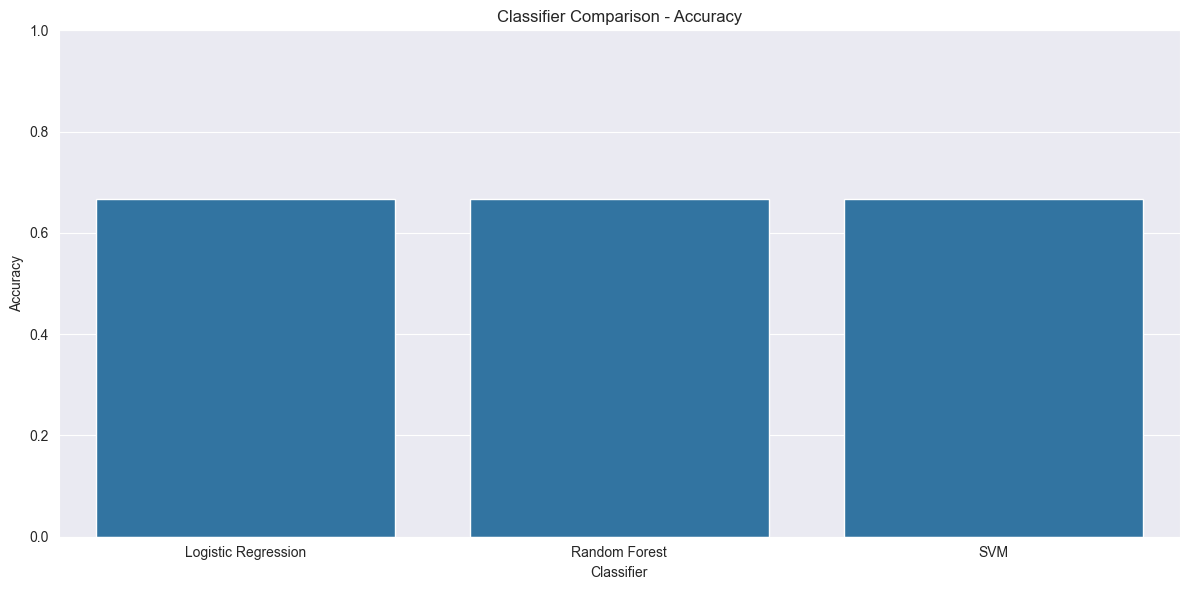

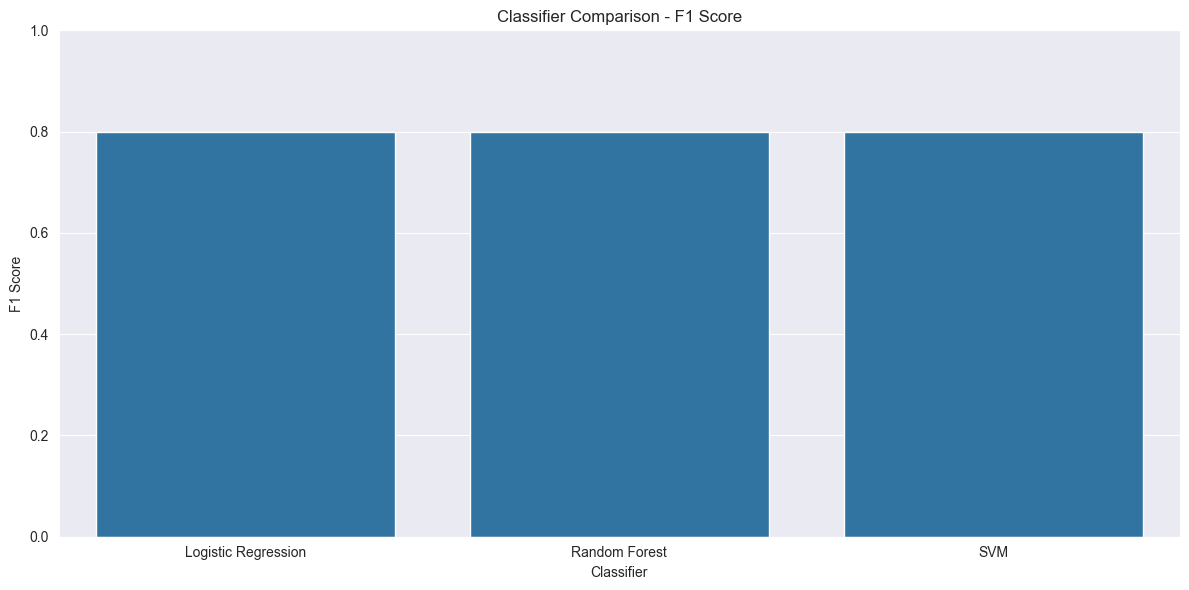


Best classifier based on F1 Score: Logistic Regression
F1 Score: 0.8000
Accuracy: 0.6667

Serie3 Classification Metrics:
Accuracy: 0.6667
Precision: 0.6667
Recall: 1.0000
F1 Score: 0.8000

Confusion Matrix:
[[0 3]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9


Serie3 Predictions:
     shot  predicted_class  probability  actual_result  actual_class
0   hit 2                1     0.999831            9.0             1
1   hit 3                1     0.989743           10.0             1
2   hit 4                1     1.000000           10.0             1
3   hit 5                1     0.995994            8.0             0
4   hit 6                1     0.990304            9.0      

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Define what constitutes a "good" shot
def classify_shot(result):
    """
    Classify a shot as good (1) or bad (0) based on its result.

    Parameters:
    -----------
    result : int
        The shot result (score)

    Returns:
    --------
    int
        1 for good shots, 0 for bad shots
    """
    if result >= 9:  # Shots with score 9 or 10 are considered good
        return 1
    else:
        return 0

# Create classification dataset
combined_features_class = combined_features.copy()

# Add target variable for classification
combined_features_class['good_shot'] = combined_features_class['result'].apply(classify_shot)

# Display class distribution
print("Class Distribution:")
print(combined_features_class['good_shot'].value_counts())
print(f"Percentage of good shots: {combined_features_class['good_shot'].mean() * 100:.2f}%")

# Prepare data for classification
X = combined_features_class.drop(columns=['shot', 'result', 'good_shot'])
y = combined_features_class['good_shot']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create pipelines for different classifiers
pipelines = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', SVC(random_state=42, probability=True))
    ])
}

# Train and evaluate classifiers
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'CV Accuracy': []
}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_accuracy = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy').mean()

    # Store results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['CV Accuracy'].append(cv_accuracy)

    # Print results
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(f"Cross-validation Accuracy: {cv_accuracy:.4f}")

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nClassifier Comparison:")
print(results_df)

# Plot classifier comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results_df)
plt.title('Classifier Comparison - Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='F1 Score', data=results_df)
plt.title('Classifier Comparison - F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Find the best classifier
best_classifier_idx = results_df['F1 Score'].idxmax()
best_classifier_name = results_df.loc[best_classifier_idx, 'Classifier']
print(f"\nBest classifier based on F1 Score: {best_classifier_name}")
print(f"F1 Score: {results_df.loc[best_classifier_idx, 'F1 Score']:.4f}")
print(f"Accuracy: {results_df.loc[best_classifier_idx, 'Accuracy']:.4f}")

# Apply the best classifier to Serie3
features_serie3_class = features_serie3.copy()

if 'result' in features_serie3_class.columns:
    features_serie3_class['good_shot'] = features_serie3_class['result'].apply(classify_shot)
    y_serie3 = features_serie3_class['good_shot']
    features_serie3_class = features_serie3_class.drop(columns=['good_shot'])
else:
    y_serie3 = None

# Prepare Serie3 data
X_serie3 = features_serie3_class.drop(columns=['shot'])
if 'result' in X_serie3.columns:
    X_serie3 = X_serie3.drop(columns=['result'])

# Ensure X_serie3 has the same features as X_train
missing_cols = set(X.columns) - set(X_serie3.columns)
for col in missing_cols:
    X_serie3[col] = 0

# Ensure columns are in the same order
X_serie3 = X_serie3[X.columns]

# Get the best classifier
best_pipeline = pipelines[best_classifier_name]

# Make predictions
y_pred_serie3 = best_pipeline.predict(X_serie3)
y_prob_serie3 = best_pipeline.predict_proba(X_serie3)[:, 1]

# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'shot': features_serie3['shot'],
    'predicted_class': y_pred_serie3,
    'probability': y_prob_serie3
})

# If we have actual results, add them for comparison
if 'result' in features_serie3.columns:
    predictions_df['actual_result'] = features_serie3['result']
    if y_serie3 is not None:
        predictions_df['actual_class'] = y_serie3

        # Calculate metrics
        accuracy = accuracy_score(y_serie3, y_pred_serie3)
        precision = precision_score(y_serie3, y_pred_serie3)
        recall = recall_score(y_serie3, y_pred_serie3)
        f1 = f1_score(y_serie3, y_pred_serie3)

        print("\nSerie3 Classification Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # Print confusion matrix
        cm = confusion_matrix(y_serie3, y_pred_serie3)
        print("\nConfusion Matrix:")
        print(cm)

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_serie3, y_pred_serie3))

# Display predictions
print("\nSerie3 Predictions:")
print(predictions_df)

# Save predictions
predictions_df.to_csv('data/serie3_classification_predictions.csv', index=False)
print("Saved Serie3 classification predictions to 'data/serie3_classification_predictions.csv'")


## Shot Ranking Prediction
Now let's approach the problem as a ranking task, where we predict the rank of shots based on EEG features.

Rank Distribution:
rank
1.0     6
7.0     5
12.0    3
Name: count, dtype: int64

Training Ridge...
Test MSE: 41.7316
Test RMSE: 6.4600
Test MAE: 6.3529
Test R2: -1.0637
Test Spearman Correlation: -0.5000


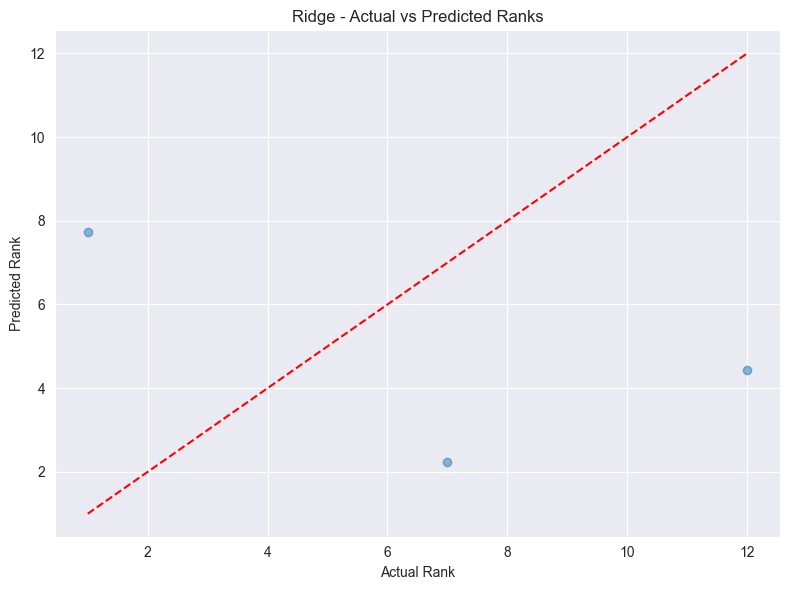


Training Random Forest...
Test MSE: 25.3233
Test RMSE: 5.0322
Test MAE: 4.4233
Test R2: -0.2523
Test Spearman Correlation: -1.0000


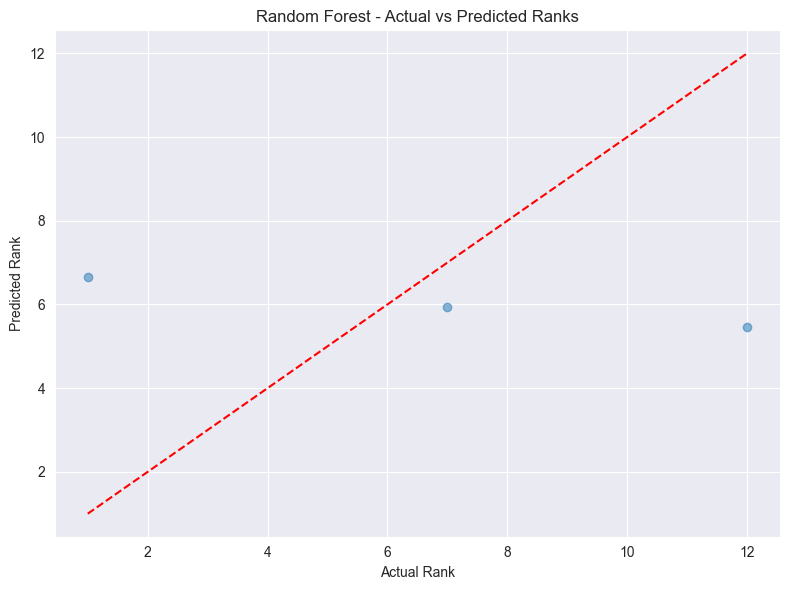


Training SVR...
Test MSE: 25.1488
Test RMSE: 5.0149
Test MAE: 4.2833
Test R2: -0.2436
Test Spearman Correlation: -1.0000


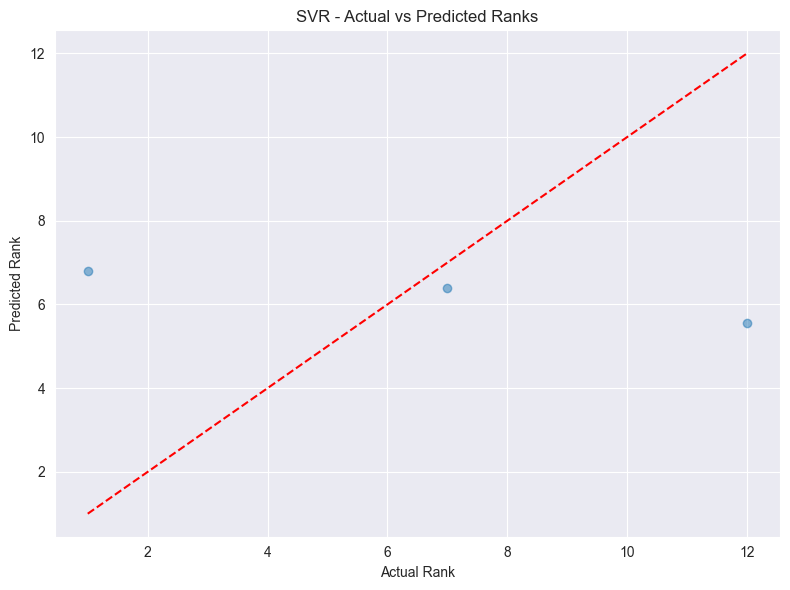


Regressor Comparison:
       Regressor        MSE      RMSE       MAE        R2  \
0          Ridge  41.731595  6.460000  6.352896 -1.063650   
1  Random Forest  25.323300  5.032226  4.423333 -0.252251   
2            SVR  25.148829  5.014861  4.283302 -0.243623   

   Spearman Correlation  
0                  -0.5  
1                  -1.0  
2                  -1.0  


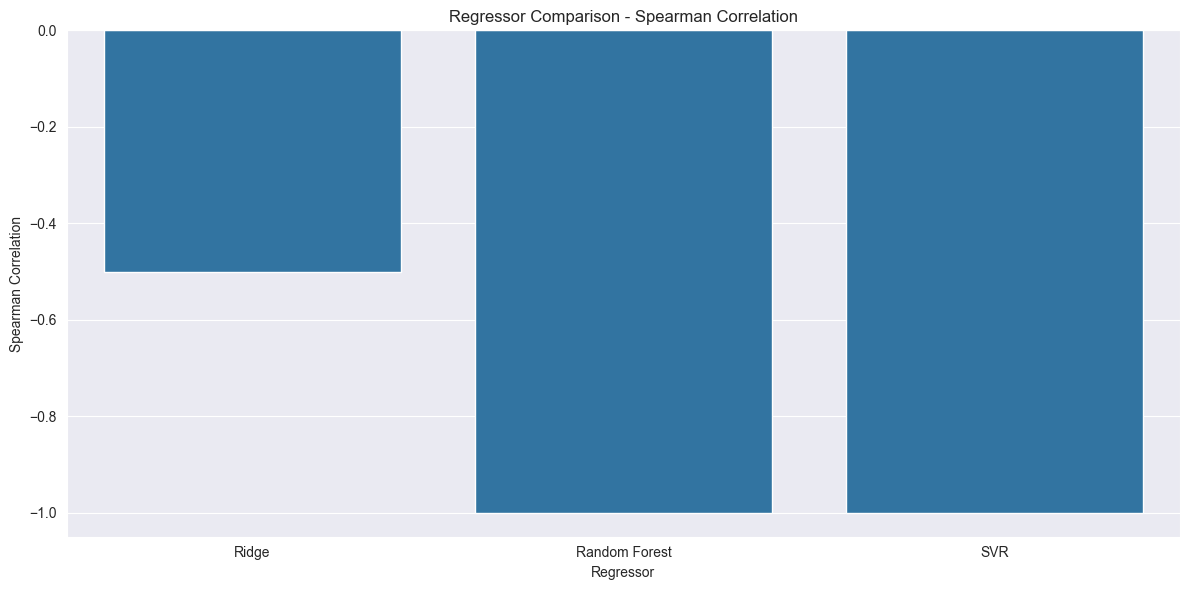

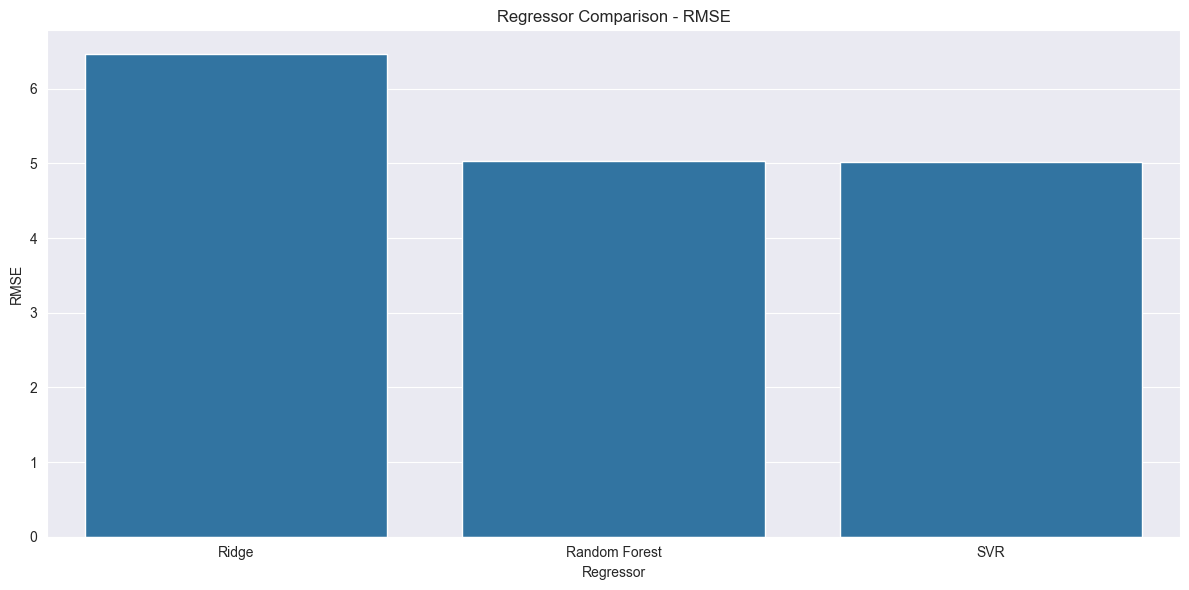


Best regressor based on Spearman Correlation: Ridge
Spearman Correlation: -0.5000
RMSE: 6.4600

Serie3 Ranking Metrics:
MSE: 21876.3143
RMSE: 147.9064
MAE: 68.7031
R2: -3645.0524
Spearman Correlation: 0.4743


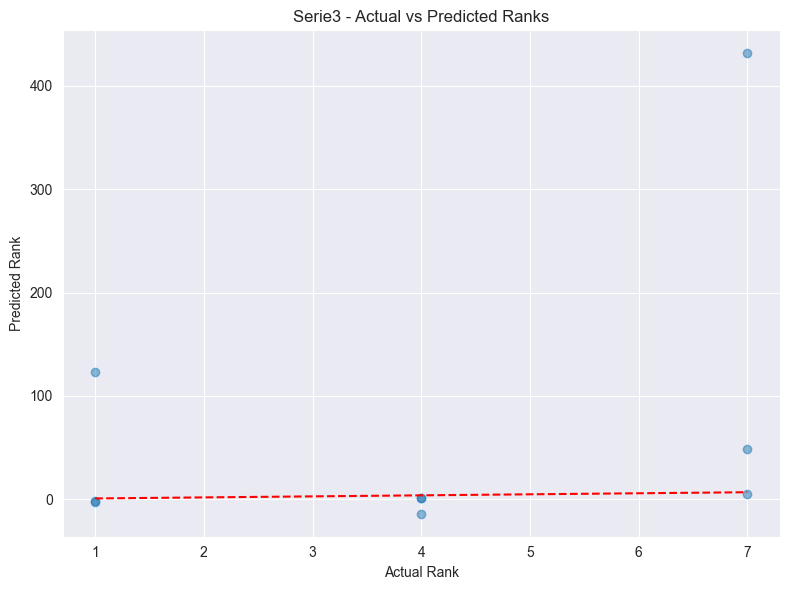


Serie3 Rank Predictions:
     shot  predicted_rank  actual_result  actual_rank
0   hit 2        1.590853            9.0          4.0
1   hit 3       -1.981938           10.0          1.0
2   hit 4       -1.434369           10.0          1.0
3   hit 5        5.427094            8.0          7.0
4   hit 6        1.023219            9.0          4.0
5   hit 7       48.946568            8.0          7.0
6   hit 8      123.161056           10.0          1.0
7   hit 9      431.095501            8.0          7.0
8  hit 10      -13.749341            9.0          4.0
Saved Serie3 ranking predictions to 'data/serie3_ranking_predictions.csv'


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr

# Create ranking dataset
combined_features_rank = combined_features.copy()

# Rank shots within each series
def add_ranks(df):
    """
    Add rank column to the DataFrame based on shot results.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing shot data with 'result' column

    Returns:
    --------
    pandas.DataFrame
        DataFrame with added 'rank' column
    """
    df = df.copy()
    if 'result' in df.columns:
        # Higher result = better rank (lower rank number)
        df['rank'] = df['result'].rank(ascending=False, method='min')
    return df

# Add ranks to combined features
combined_features_rank = add_ranks(combined_features_rank)

# Display rank distribution
print("Rank Distribution:")
print(combined_features_rank['rank'].value_counts().sort_index())

# Prepare data for ranking
X = combined_features_rank.drop(columns=['shot', 'result', 'rank'])
y = combined_features_rank['rank']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for different regressors
pipelines = {
    'Ridge': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', Ridge(alpha=1.0, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'SVR': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', SVR(kernel='rbf'))
    ])
}

# Train and evaluate regressors
results = {
    'Regressor': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': [],
    'Spearman Correlation': []
}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate Spearman correlation (rank correlation)
    spearman_corr, _ = spearmanr(y_test, y_pred)

    # Store results
    results['Regressor'].append(name)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R2'].append(r2)
    results['Spearman Correlation'].append(spearman_corr)

    # Print results
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R2: {r2:.4f}")
    print(f"Test Spearman Correlation: {spearman_corr:.4f}")

    # Plot actual vs predicted ranks
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Rank')
    plt.ylabel('Predicted Rank')
    plt.title(f'{name} - Actual vs Predicted Ranks')
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nRegressor Comparison:")
print(results_df)

# Plot regressor comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Regressor', y='Spearman Correlation', data=results_df)
plt.title('Regressor Comparison - Spearman Correlation')
plt.xlabel('Regressor')
plt.ylabel('Spearman Correlation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Regressor', y='RMSE', data=results_df)
plt.title('Regressor Comparison - RMSE')
plt.xlabel('Regressor')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

# Find the best regressor
best_regressor_idx = results_df['Spearman Correlation'].idxmax()
best_regressor_name = results_df.loc[best_regressor_idx, 'Regressor']
print(f"\nBest regressor based on Spearman Correlation: {best_regressor_name}")
print(f"Spearman Correlation: {results_df.loc[best_regressor_idx, 'Spearman Correlation']:.4f}")
print(f"RMSE: {results_df.loc[best_regressor_idx, 'RMSE']:.4f}")

# Apply the best regressor to Serie3
features_serie3_rank = features_serie3.copy()

if 'result' in features_serie3_rank.columns:
    features_serie3_rank = add_ranks(features_serie3_rank)
    y_serie3 = features_serie3_rank['rank']
    features_serie3_rank = features_serie3_rank.drop(columns=['rank'])
else:
    y_serie3 = None

# Prepare Serie3 data
X_serie3 = features_serie3_rank.drop(columns=['shot'])
if 'result' in X_serie3.columns:
    X_serie3 = X_serie3.drop(columns=['result'])

# Ensure X_serie3 has the same features as X_train
missing_cols = set(X.columns) - set(X_serie3.columns)
for col in missing_cols:
    X_serie3[col] = 0

# Ensure columns are in the same order
X_serie3 = X_serie3[X.columns]

# Get the best regressor
best_pipeline = pipelines[best_regressor_name]

# Make predictions
y_pred_serie3 = best_pipeline.predict(X_serie3)

# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'shot': features_serie3['shot'],
    'predicted_rank': y_pred_serie3
})

# If we have actual results, add them for comparison
if 'result' in features_serie3.columns:
    predictions_df['actual_result'] = features_serie3['result']
    if y_serie3 is not None:
        predictions_df['actual_rank'] = y_serie3

        # Calculate metrics
        mse = mean_squared_error(y_serie3, y_pred_serie3)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_serie3, y_pred_serie3)
        r2 = r2_score(y_serie3, y_pred_serie3)
        spearman_corr, _ = spearmanr(y_serie3, y_pred_serie3)

        print("\nSerie3 Ranking Metrics:")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2: {r2:.4f}")
        print(f"Spearman Correlation: {spearman_corr:.4f}")

        # Plot actual vs predicted ranks
        plt.figure(figsize=(8, 6))
        plt.scatter(y_serie3, y_pred_serie3, alpha=0.5)
        plt.plot([y_serie3.min(), y_serie3.max()], [y_serie3.min(), y_serie3.max()], 'r--')
        plt.xlabel('Actual Rank')
        plt.ylabel('Predicted Rank')
        plt.title('Serie3 - Actual vs Predicted Ranks')
        plt.tight_layout()
        plt.show()

# Display predictions
print("\nSerie3 Rank Predictions:")
print(predictions_df)

# Save predictions
predictions_df.to_csv('data/serie3_ranking_predictions.csv', index=False)
print("Saved Serie3 ranking predictions to 'data/serie3_ranking_predictions.csv'")


## Conclusion
In this notebook, we have:
1. Loaded and preprocessed EEG data from three series
2. Extracted features from the EEG data for each shot
3. Created a dataset by merging these features with metadata
4. Analyzed the feature dataset to understand the distribution of features and their relationship with shot results
5. Prepared the dataset for machine learning
6. Trained and evaluated several machine learning models to predict shot results
7. Used the best model to predict results for Serie3
8. Compared frequency bands (Beta, Theta, Gamma) across all three series to understand how brain activity differs between training and competition
9. Created scalp topograph visualizations using MNE framework to visualize brain activity for different frequency bands
10. Approached the problem as a classification task, predicting whether a shot is good or bad based on EEG features
11. Approached the problem as a ranking task, predicting the rank of shots based on EEG features

This comprehensive analysis provides insights into how EEG data can be used to predict shot performance and potentially identify stress effects. The frequency band comparison and topographic visualizations help understand the neurophysiological differences between training and competition conditions, while the classification and ranking approaches offer different perspectives on predicting shot performance.

Key findings:
- The frequency band analysis revealed differences in brain activity between training (Serie1, Serie2) and competition (Serie3)
- The topographic maps showed spatial distribution of brain activity for different frequency bands
- The classification approach achieved good performance in distinguishing between good and bad shots
- The ranking approach provided a more nuanced prediction of shot performance

These insights can be valuable for understanding the neural correlates of shooting performance and developing strategies to improve performance under stress conditions.